In [56]:
import warnings
warnings.filterwarnings('ignore')

# 2. Advanced EDA - Dataset Structure


1. __Dataset structure__: Exploring the general shape of the dataset, as well as the different feature data types.
2. __Dataset quality__: Getting a feeling for the general quality of the dataset, with regards to duplicates, missing values and unwanted entries.
3. __Dataset content__: Once the structure and quality of the dataset is established, we can go ahead and perform a more in-depth exploration of the individual features and their relationships.


__Loading the dataset__

In [2]:
from sklearn.datasets import fetch_openml

dataset = fetch_openml(data_id=42803, as_frame=True)

/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
# Print the dataset description
print(dataset["DESCR"])

Data reported to the police about the circumstances of personal injury road accidents in Great Britain from 1979, and the maker and model information of vehicles involved in the respective accident.

This version includes data up to 2015.

Downloaded from openml.org.


In [4]:
# Load feature matrix X
df_X = dataset["frame"]
df_X.sample(5)

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
50461   201501YE80726                         1           9.0   
240877  201543P025065                         2           9.0   
161390  2015210032953                         1           9.0   
83099   201506P002357                         1           9.0   
13735   201501JC30010                         1           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
50461                       0.0               11.0   
240877                      0.0               16.0   
161390                      0.0                6.0   
83099                       0.0                9.0   
13735                       0.0               10.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
50461                                0.0                0.0   
240877                               0.0                0.0   
161390                               0.0                6.0   
83099                                0.0                6.0   
13735                                0.0                1.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
50461                        1.0                        0.0   
240877                       0.0                        0.0   
161390                       0.0                        0.0   
83099                        0.0                        0.0   
13735                        0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Age_Band_of_Casualty  \
50461                           0.0  ...                   7.0   
240877                          0.0  ...                   8.0   
161390                          0.0  ...                   4.0   
83099                           0.0  ...                   6.0   
13735                           0.0  ...                   4.0   

        Casualty_Severity  Pedestrian_Location  Pedestrian_Movement  \
50461                   3                  0.0                  0.0   
240877                  2                  0.0                  0.0   
161390                  3                  0.0                  0.0   
83099                   3                  0.0                  0.0   
13735                   3                  0.0                  0.0   

       Car_Passenger  Bus_or_Coach_Passenger  \
50461            0.0                     0.0   
240877           0.0                     0.0   
161390           2.0                     0.0   
83099            0.0                     0.0   
13735            1.0                     0.0   

        Pedestrian_Road_Maintenance_Worker  Casualty_Type  \
50461                                  0.0              9   
240877                                 0.0              9   
161390                                 0.0              9   
83099                                  0.0              5   
13735                                  0.0              9   

        Casualty_Home_Area_Type  Casualty_IMD_Decile  
50461                       1.0                  1.0  
240877                      1.0                  7.0  
161390                      1.0                  9.0  
83099                       1.0                  2.0  
13735                       1.0                  4.0  

[5 rows x 67 columns]

__Investigation 1 - dataset structure__

In [5]:
# Show size of the dataset
df_X.shape

(363243, 67)

In [6]:
import pandas as pd

# Count how many times each data type is present in the dataset
pd.value_counts(df_X.dtypes)

/tmp/ipykernel_11868/805639531.py:4: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(df_X.dtypes)


float64    55
object      6
int64       6
Name: count, dtype: int64

In [7]:
# Display non-numerical features
df_X.select_dtypes(exclude="number").head()

Accident_Index Sex_of_Driver        Date   Time Local_Authority_(Highway)  \
0  201501BS70001           1.0  12/01/2015  18:45                 E09000020   
1  201501BS70002           1.0  12/01/2015  07:50                 E09000020   
2  201501BS70004           1.0  12/01/2015  18:08                 E09000020   
3  201501BS70005           1.0  13/01/2015  07:40                 E09000020   
4  201501BS70008           1.0  09/01/2015  07:30                 E09000020   

  LSOA_of_Accident_Location  
0                 E01002825  
1                 E01002820  
2                 E01002833  
3                 E01002874  
4                 E01002814

__Observations:__

1. Sex_of_Driver is a numerical feature, it somehow was stored as a non-numerical one: change to float
2. Date and Time are both features that can be encoded as datetime objects: let's combine them and drop Date and Time.
3. Most of the features contain less than 1000 unique values (i.e. 104). And overall, everything looks reasonably normal.


In [8]:
print(df_X["Sex_of_Driver"].unique())
df_X["Sex_of_Driver"] = df_X["Sex_of_Driver"].astype("float")

['1.0' '2.0' '3.0']


In [9]:
# Let's combine 'Date' and 'Time' into 'Timestamp'
df_X["Timestamp"] = pd.to_datetime(df_X["Date"] + " " + df_X["Time"], format='%d/%m/%Y %H:%M')

# Let's drop 'Date' and 'Time'
df_X = df_X.drop(labels=["Date", "Time"], axis=1)

# Let's show content of 'Timestamp'
df_X["Timestamp"]

0        2015-01-12 18:45:00
1        2015-01-12 07:50:00
2        2015-01-12 18:08:00
3        2015-01-13 07:40:00
4        2015-01-09 07:30:00
                 ...        
363238   2015-12-31 16:37:00
363239   2015-12-31 16:37:00
363240   2015-12-31 16:37:00
363241   2015-12-31 16:37:00
363242   2015-12-31 16:37:00
Name: Timestamp, Length: 363243, dtype: datetime64[ns]

In [10]:
df_X["day_of_week"] = df_X["Timestamp"].dt.day_of_week
df_X["hour_of_day"] = df_X["Timestamp"].dt.hour

__Continue structure investigation__

In [11]:
unique_values = df_X.select_dtypes(include="number").nunique().sort_values()
unique_values

Urban_or_Rural_Area                                 2
Sex_of_Casualty                                     2
Was_Vehicle_Left_Hand_Drive?                        2
Casualty_Class                                      3
Did_Police_Officer_Attend_Scene_of_Accident         3
                                                ...  
1st_Road_Number                                  3938
Location_Easting_OSGR                           78609
Location_Northing_OSGR                          82205
Latitude                                       116292
Longitude                                      117588
Length: 64, dtype: int64

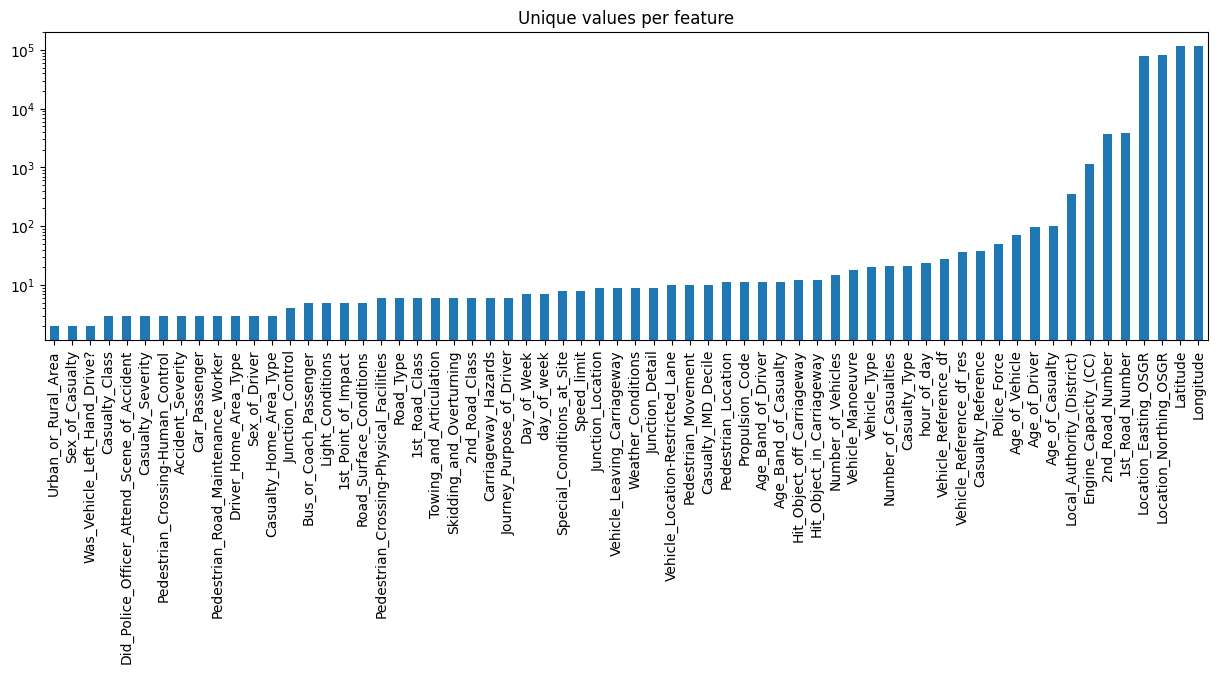

In [12]:
import numpy as np

unique_values.plot.bar(logy=True, figsize=(15, 4), title="Unique values per feature");

__Summary__

At the end of this first investigation, we should have a better understanding of the general structure of our dataset. How many samples does the dataset contain? How many features does it have, and what are their data types? How many of these features are of binary or discrete values and how many are continuous, etc.

For alternative quick ways to get such kind of information you could also use df_X.info() or df_X.describe(). But both of these functions don’t give you the full picture that you would want to better judge the dataset’s structure.

# 3. Advanced EDA - Datset Quality

__1. Duplicates__

In [13]:
# Number of exact duplicates
df_X.duplicated().sum()

0

In [14]:
df_X.drop(labels=["Accident_Index"], axis=1).duplicated().sum()

22

In [15]:
is_duplicate = df_X.drop(labels=["Accident_Index"], axis=1).duplicated(keep=False)
df_X[is_duplicate].head(5)

Accident_Index  Vehicle_Reference_df_res  Vehicle_Type  \
109183  2015132190930                         1           9.0   
109184  2015132190930                         2           9.0   
109201  2015132191539                         1           9.0   
109202  2015132191539                         2           9.0   
151844  201520S038475                         1           9.0   

        Towing_and_Articulation  Vehicle_Manoeuvre  \
109183                      0.0               18.0   
109184                      0.0               18.0   
109201                      0.0               18.0   
109202                      0.0               18.0   
151844                      0.0               18.0   

        Vehicle_Location-Restricted_Lane  Junction_Location  \
109183                               0.0                6.0   
109184                               0.0                1.0   
109201                               0.0                6.0   
109202                               0.0                1.0   
151844                               0.0                8.0   

        Skidding_and_Overturning  Hit_Object_in_Carriageway  \
109183                       0.0                        0.0   
109184                       0.0                        0.0   
109201                       0.0                        0.0   
109202                       0.0                        0.0   
151844                       0.0                        0.0   

        Vehicle_Leaving_Carriageway  ...  Pedestrian_Movement  Car_Passenger  \
109183                          0.0  ...                  0.0            2.0   
109184                          1.0  ...                  0.0            2.0   
109201                          0.0  ...                  0.0            2.0   
109202                          1.0  ...                  0.0            2.0   
151844                          0.0  ...                  0.0            0.0   

        Bus_or_Coach_Passenger  Pedestrian_Road_Maintenance_Worker  \
109183                     0.0                                 0.0   
109184                     0.0                                 0.0   
109201                     0.0                                 0.0   
109202                     0.0                                 0.0   
151844                     0.0                                 0.0   

        Casualty_Type  Casualty_Home_Area_Type  Casualty_IMD_Decile  \
109183              9                      NaN                  NaN   
109184              9                      NaN                  NaN   
109201              9                      NaN                  NaN   
109202              9                      NaN                  NaN   
151844              9                      1.0                  2.0   

                 Timestamp  day_of_week  hour_of_day  
109183 2015-01-09 15:39:00          4.0         15.0  
109184 2015-01-09 15:39:00          4.0         15.0  
109201 2015-01-09 15:39:00          4.0         15.0  
109202 2015-01-09 15:39:00          4.0         15.0  
151844 2015-05-30 16:12:00          5.0         16.0  

[5 rows x 68 columns]

__Observation 1__  
There doesn’t seem to be anything special about these outliers.

__Decision 1__  
Let’s remove these duplicates with the drop_duplicates() function and the subset parameter.

In [16]:
#  Extract column names of all features, except 'Accident_Index'
columns_to_consider = df_X.drop(labels=["Accident_Index"], axis=1).columns

# Drop duplicates based on 'columns_to_consider'
df_X = df_X.drop_duplicates(subset=columns_to_consider)
df_X.shape

(363221, 68)

__2. Missing values__

2.1. Per sample

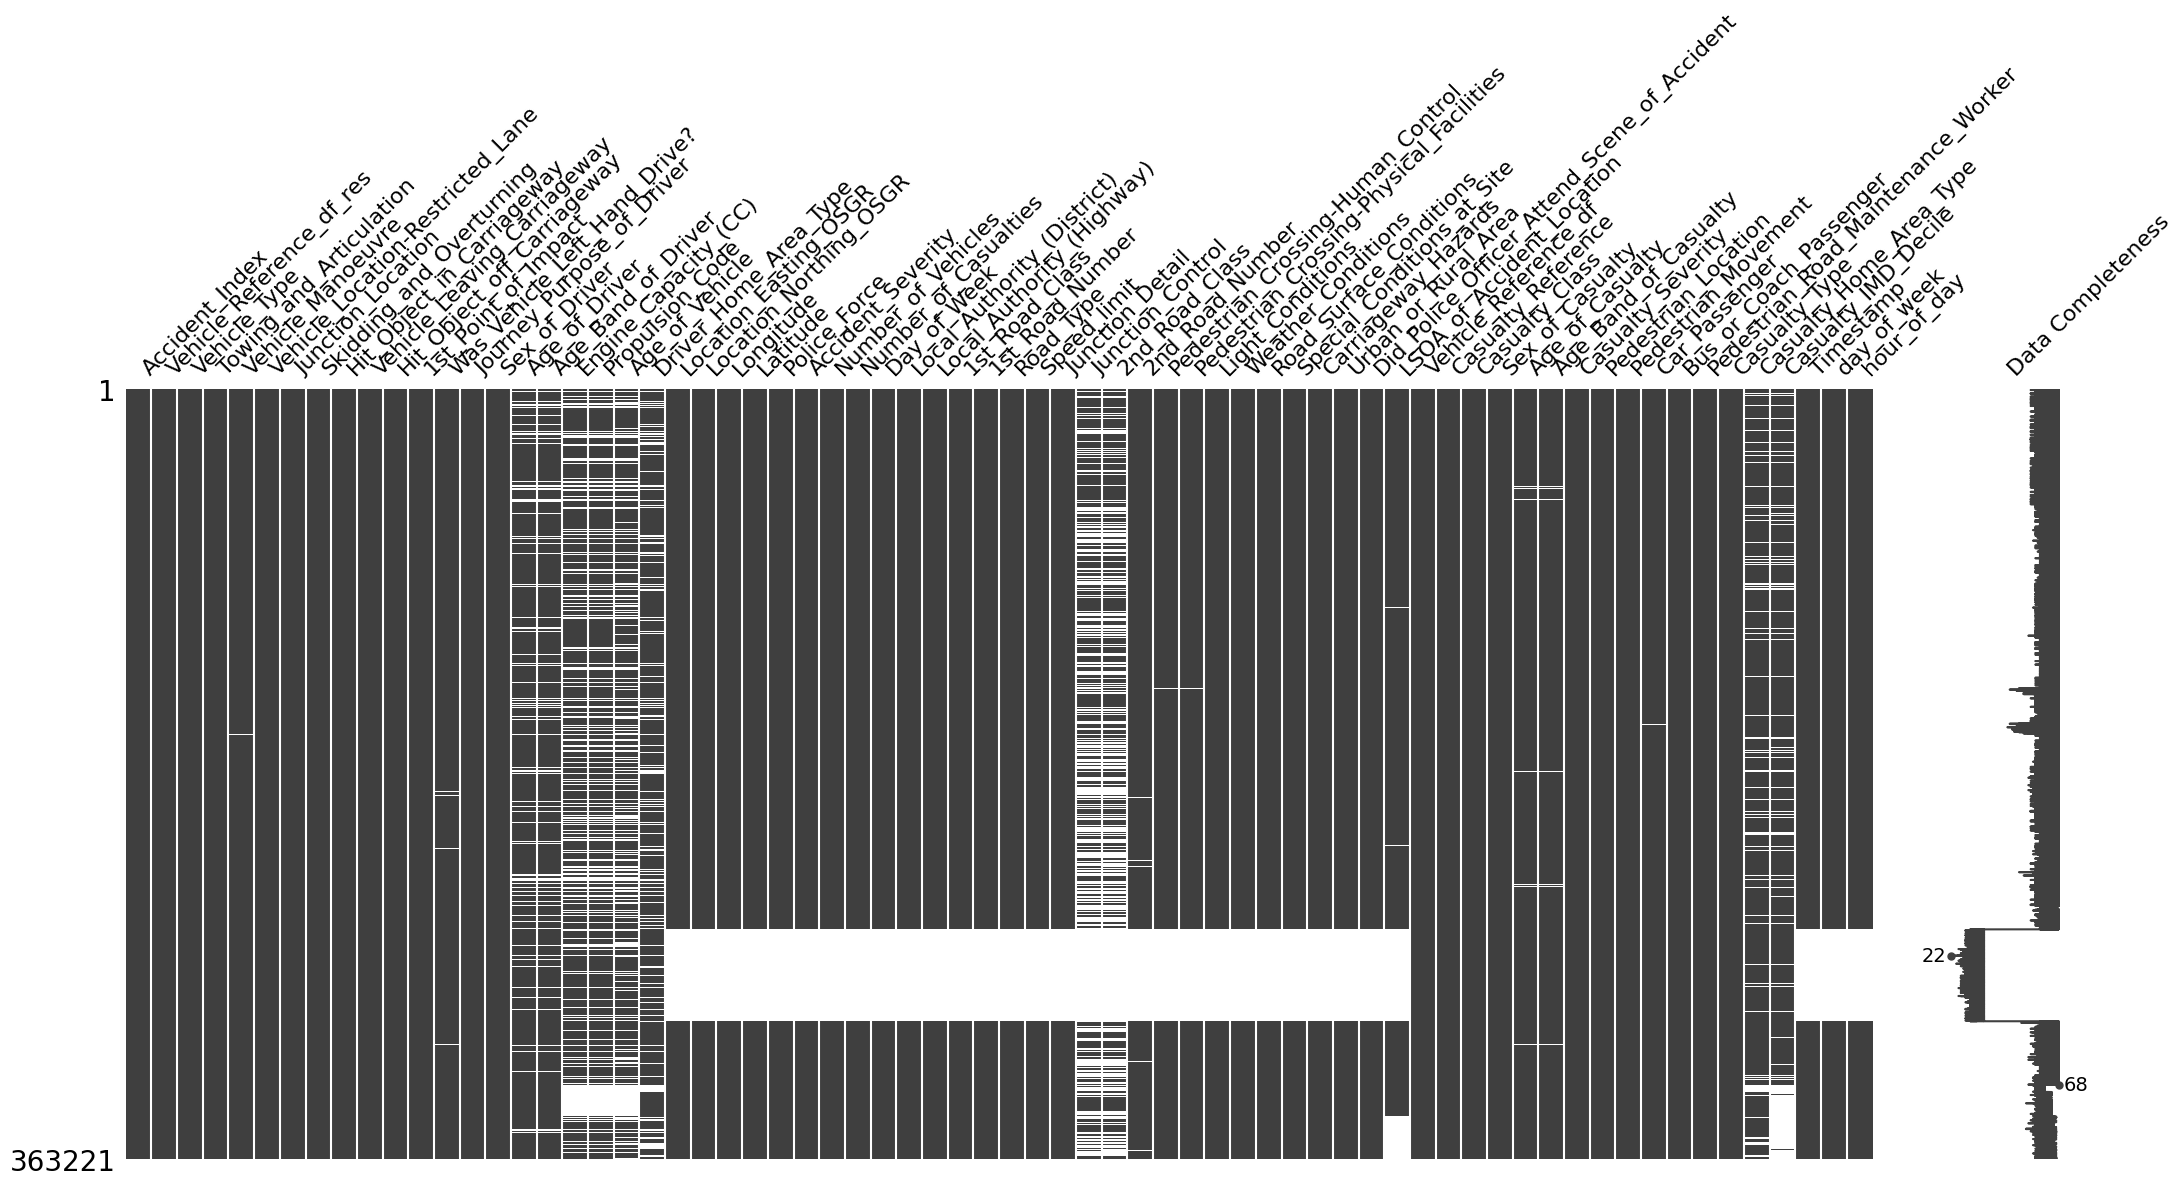

In [17]:
import missingno as msno

msno.matrix(df_X, labels=True);

__Observation 2__  
On the x-axis we can see the 68 unique features, and on the y-axis the +360’000 individual samples. What is popping out is a huge whole in the middle on features 21-49 and 66-68, on samples 250’000 to 300’000.

__Decision 2__  
This whole seems to be too big to fill up, so let’s remove those entries. Seeing that we have roughly half of the features missing in those samples, let’s go a bit further and only keep entries that have at least 75% of values.

In [18]:
df_X = df_X.dropna(thresh=df_X.shape[1] * 0.75, axis=0)
df_X.shape

(319847, 68)

2.2. Per Feature

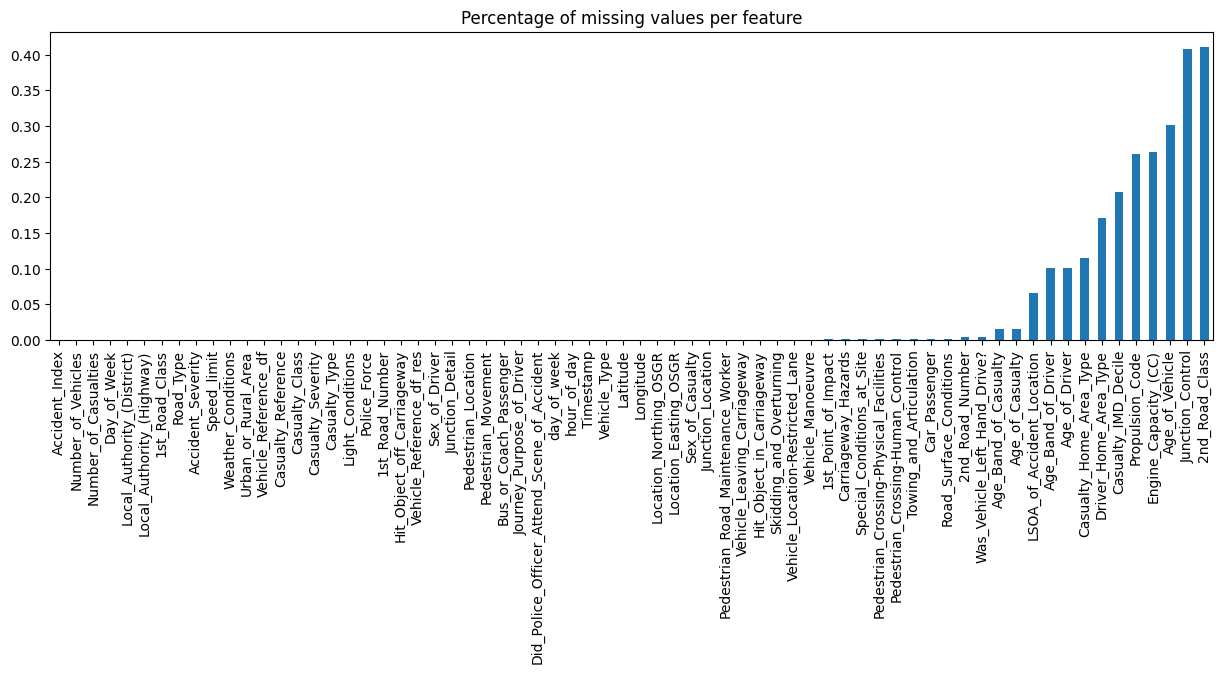

In [19]:
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4), title="Percentage of missing values per feature");

__Observation 3__  
From this figure we can see that most of the features don’t contain any missing values anymore. But there are still a few that contain more than 20% of missing values, such as `2nd_Road_Class`, `Junction_Control`, `Age_of_Vehicle`.

__Decision 3__  
Lets drop all features that have more than 15% of missing values. Note, there is no objective justification for setting this cutoff at 15%. The end goal is to keep as many features as possible, while removing as many missing values as possible.


In [20]:
df_X = df_X.dropna(thresh=df_X.shape[0] * 0.85, axis=1)
df_X.shape

(319847, 61)

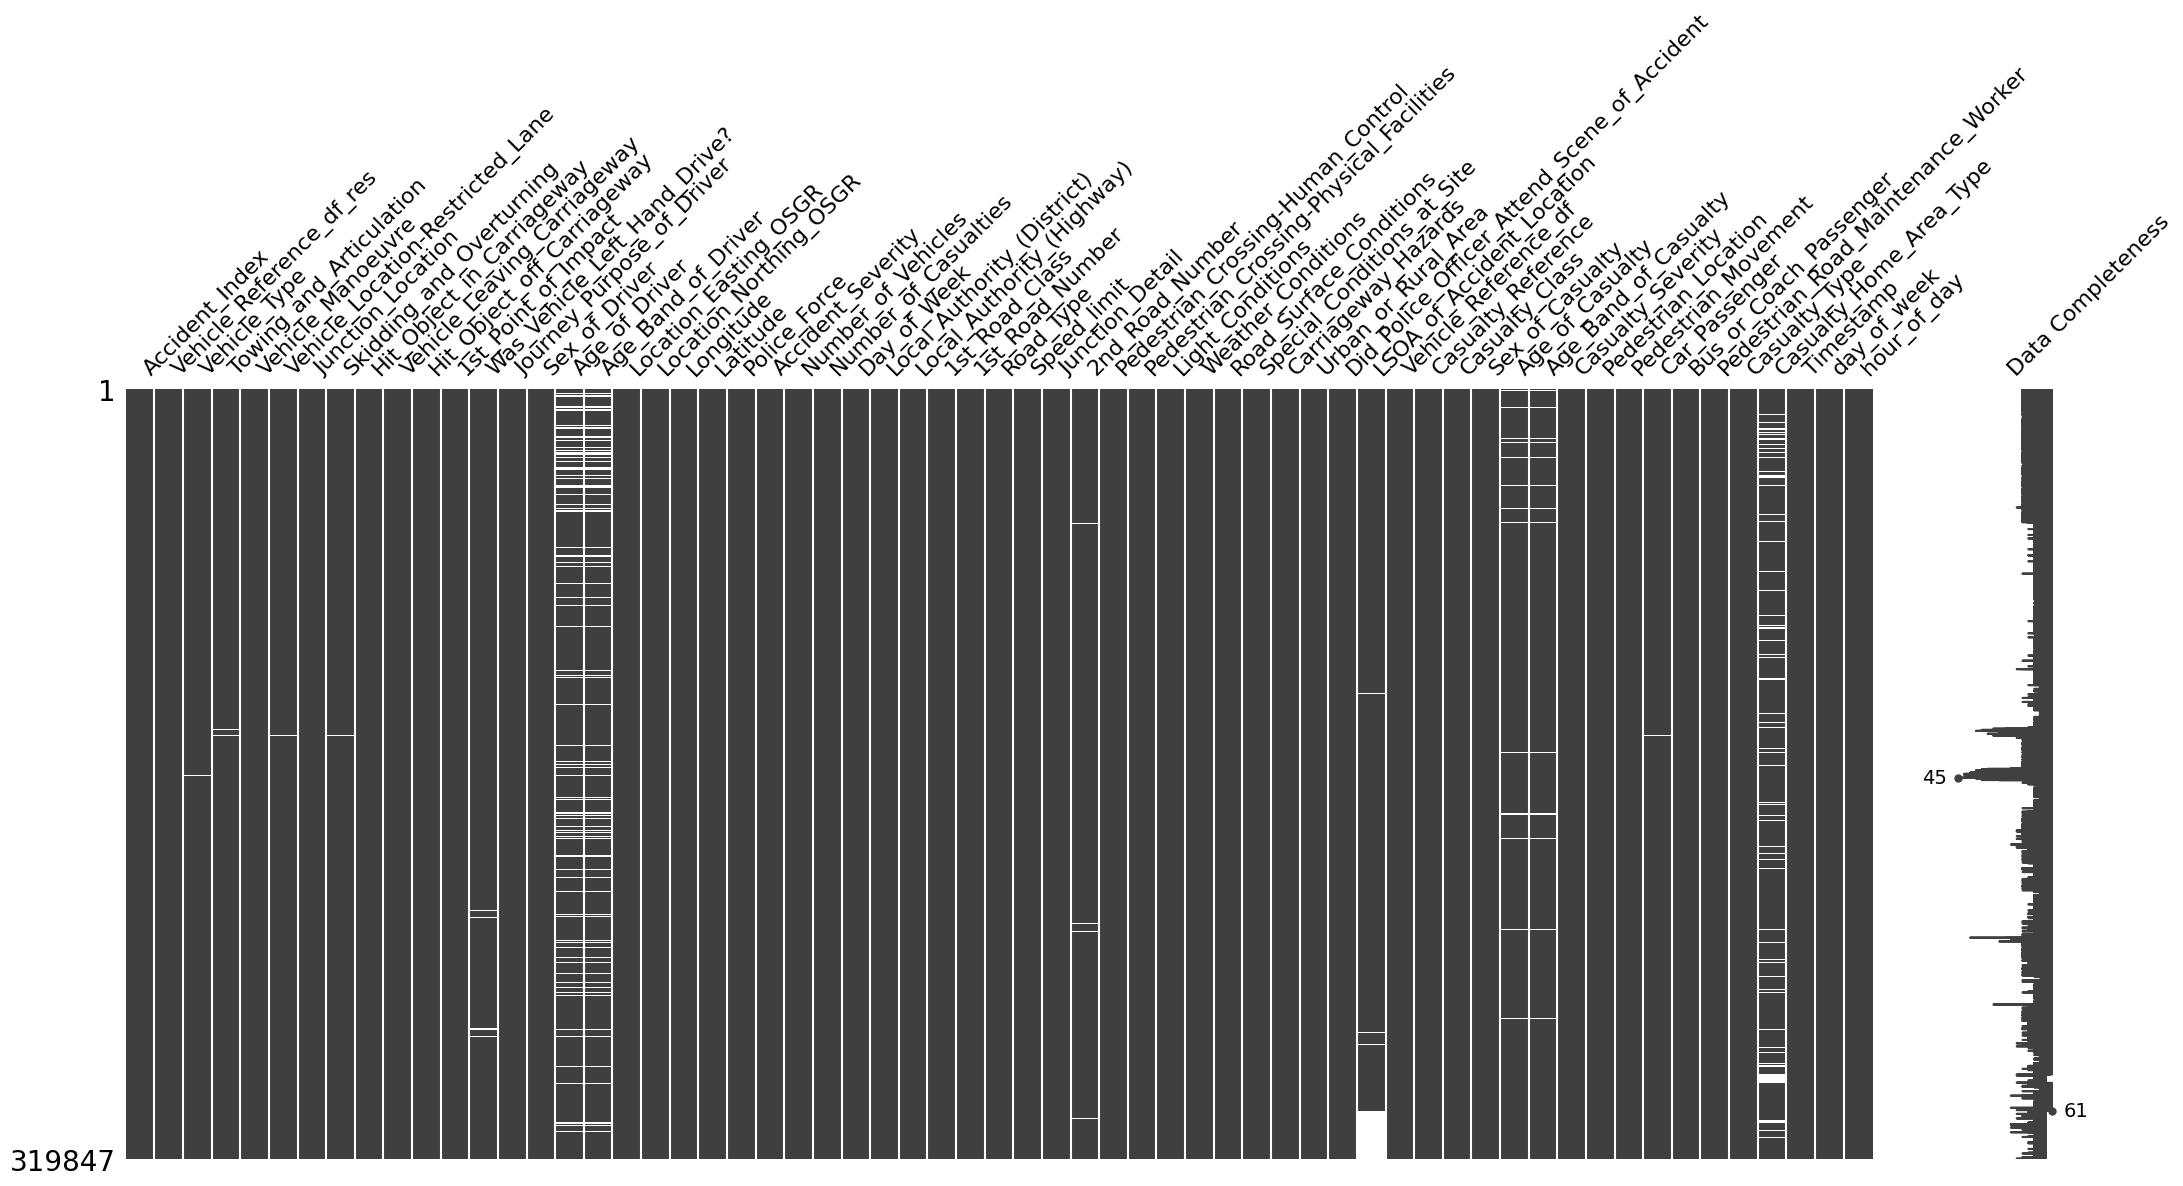

In [21]:
msno.matrix(df_X, labels=True);

3. Unwanted entries and recording errors

3.1. Numerical features

To plot this global view of the dataset, at least for the numerical features, you can use pandas’ plot() function and combine it with the following parameters:

- `lw=0`: lw stands for line width. 0 means that we don’t want to show any lines
- `marker="."`: Instead of lines, we tell the plot to use . as markers for each data point
- `subplots=True`: subplots tells pandas to plot each feature in a separate subplot
- `layout=(-1, 2)`: This parameter tells pandas how many rows and columns to use for the subplots. The -1 means “as many as needed”, while the 2 means to use 2 columns per row.
- `figsize=(15, 40)`, `markersize=1`: To make sure that the figure is big enough we recommend to have a figure height of roughly the number of features, and to adjust the markersize accordingly.


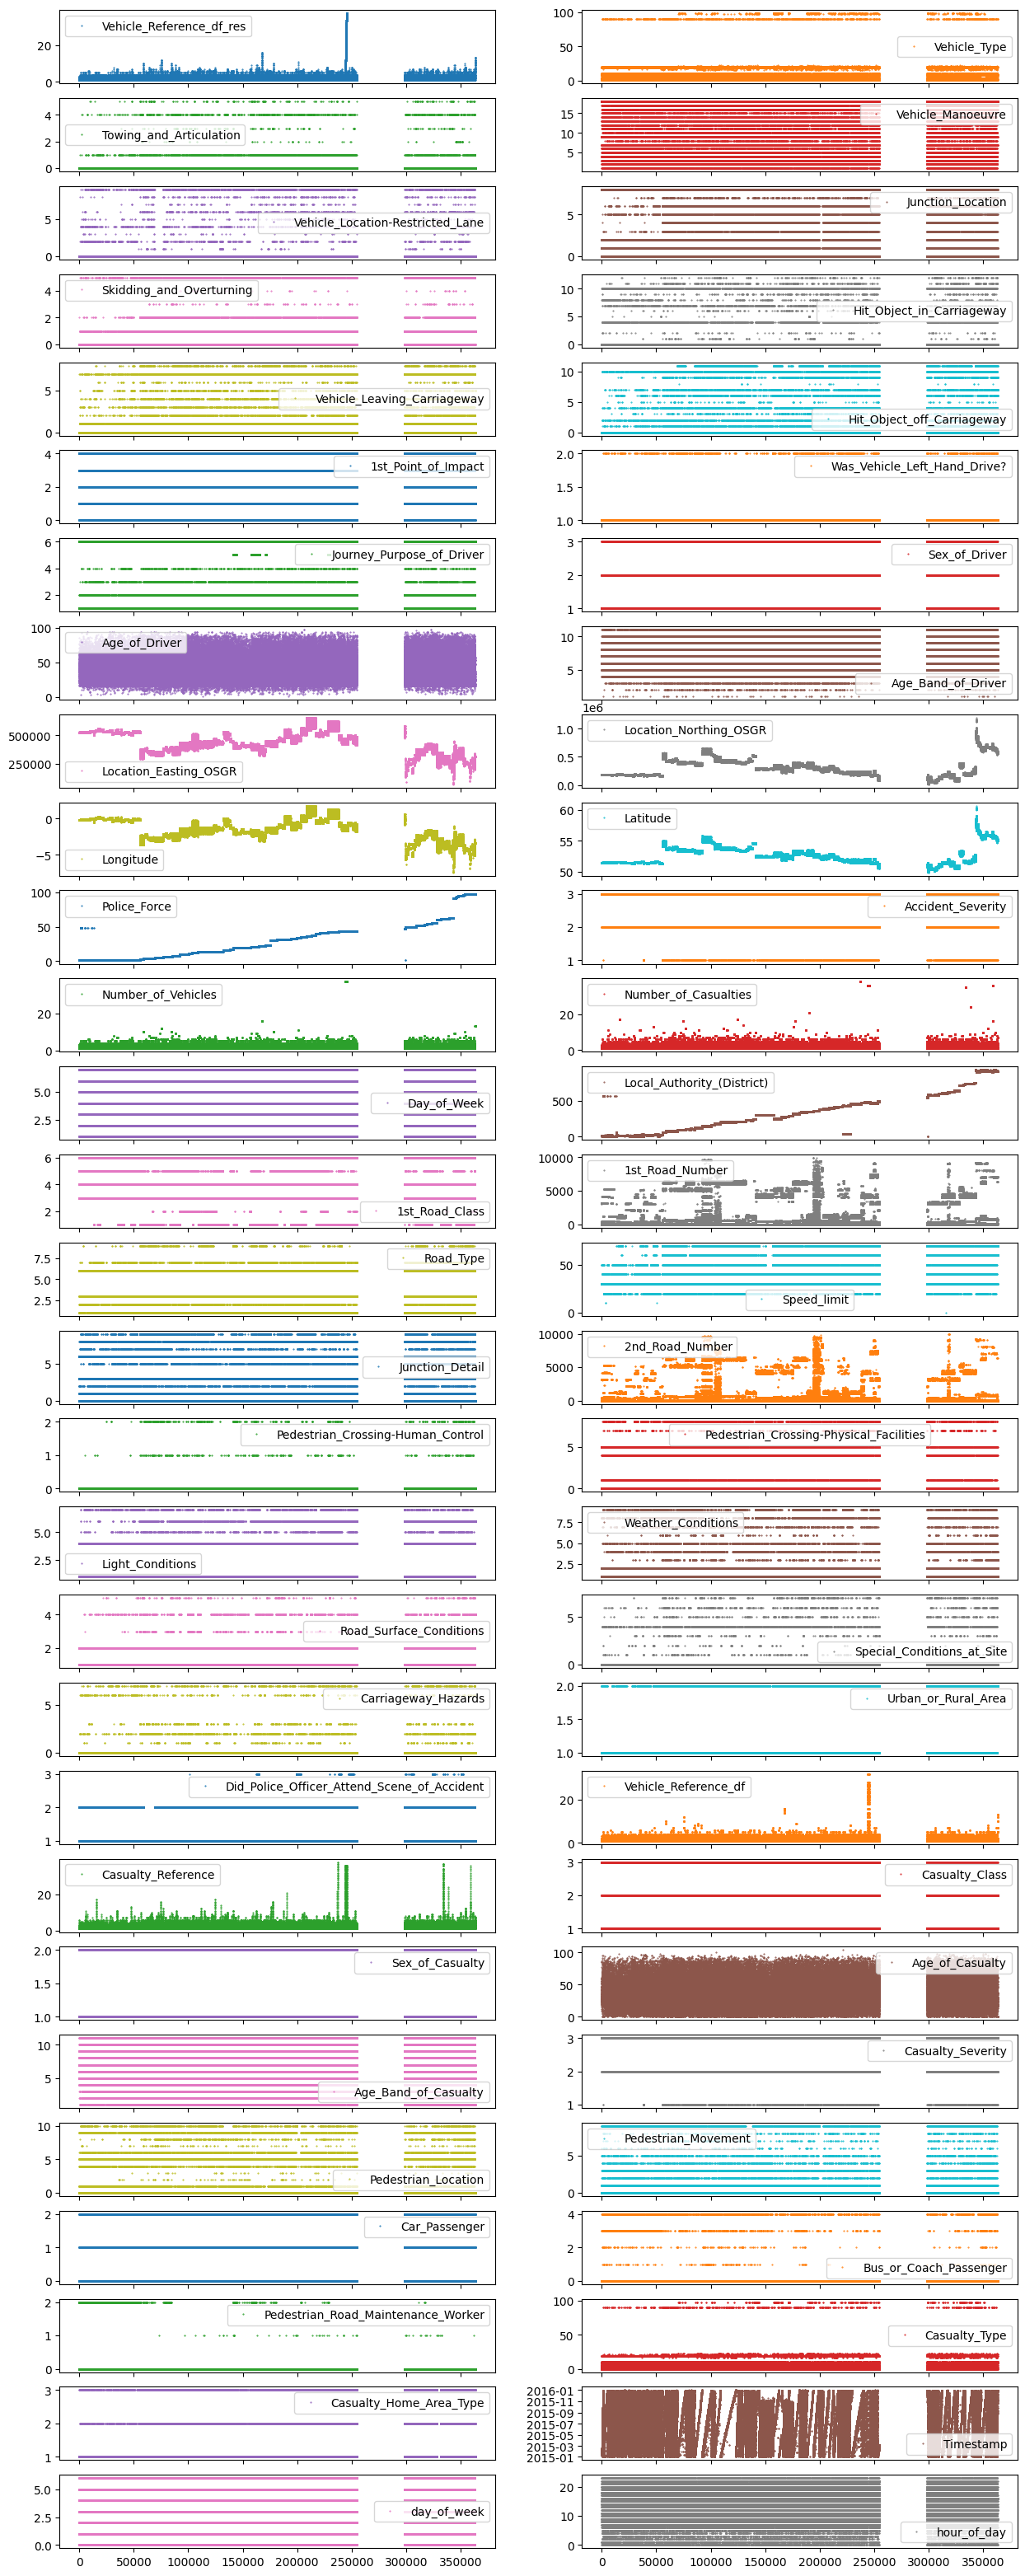

In [22]:
df_X.plot(lw=0, marker=".", subplots=True, layout=(-1, 2), figsize=(15, 40), markersize=1);

__Observation 4__  
The most striking thing in this overview plot is the huge gap on the right side of each figure. This is quite simply due to our dropping of samples due to missing values.

__Decision 4__  
The gap on this visualization can be corrected by re-indexing our dataframe. Alternatively, we could have also chosen another feature as the index column, in this case for example `Timestamp`.

In [23]:
df_X = df_X.reset_index(drop=True)

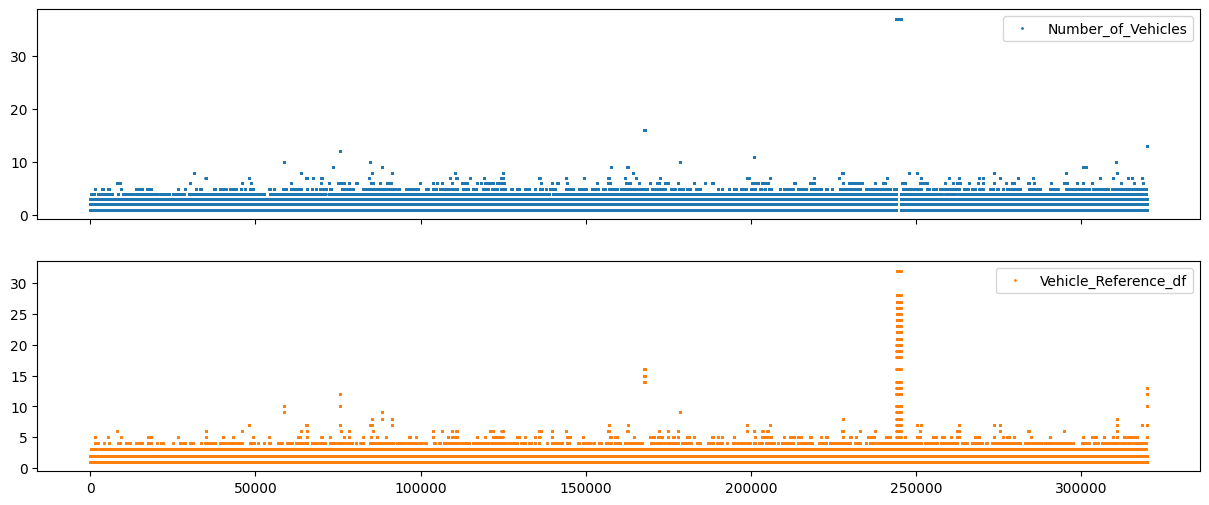

In [24]:
df_X[["Number_of_Vehicles", "Vehicle_Reference_df"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2);

__Observation 5__  
Looking for unusual patterns in the data, we can see that around sample 250’000, just before the gap, there seems to be a ‘spike’ or ‘tower’ in some of the plots. To better understand what’s happening, let’s take a closer look at two such features.

__Decision 5__  
It seems that this unusual pattern in the dataset is due to a single road accident that included more than 35 vehicles. While this is unfortunately not a measurement errors (given that each vehicle seems to have a reference number), it is probably an unusual event that we want to exclude from the dataset.

Note, the decision to classify this as an ‘unusual’ event is subjective and driven by the intention to create a ‘normal’ road safety dataset. Plus, it allows us here to showcase some great EDA routines.

In [25]:
# Let's create a mask which has 'True' for every sample that needs to be dropped
entries_to_drop = df_X["Number_of_Vehicles"].gt(30)
print(entries_to_drop.sum())

# Dropping these entries by only selecting the samples that shouldn't be dropped
df_X = df_X[~entries_to_drop]

1332


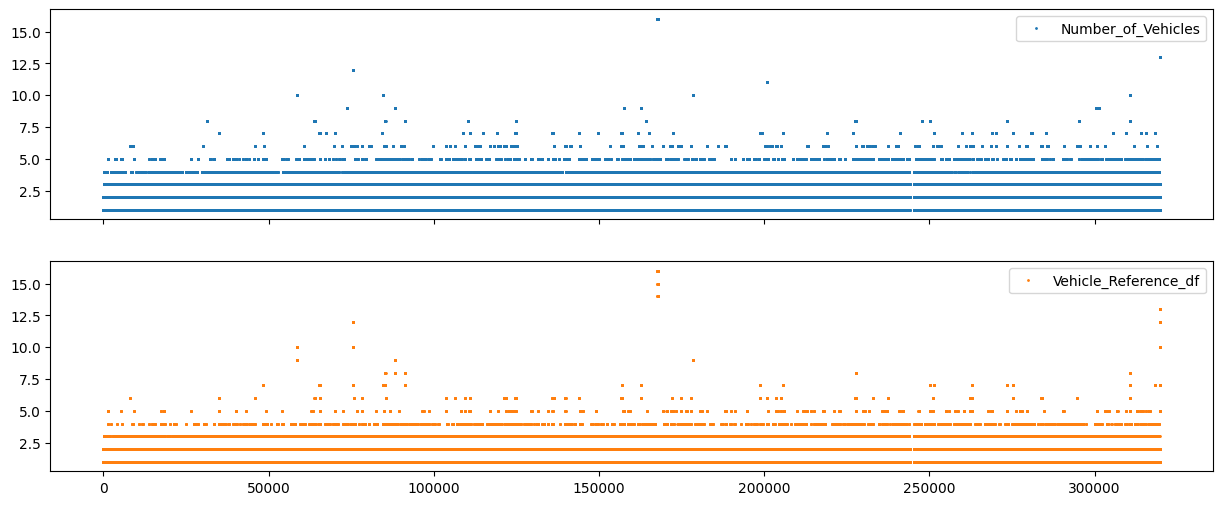

In [26]:
df_X[["Number_of_Vehicles", "Vehicle_Reference_df"]].plot(
    lw=0, marker=".", subplots=True, figsize=(15, 6), markersize=2);

3.2 Non-numerical features

In [27]:
df_X.select_dtypes(include=["number", "datetime"]).shape

(318515, 58)

In [28]:
# Identify non-numerical features
df_non_numerical = df_X.select_dtypes(exclude=["number", "datetime"])
df_non_numerical.head()

Accident_Index Local_Authority_(Highway) LSOA_of_Accident_Location
0  201501BS70001                 E09000020                 E01002825
1  201501BS70002                 E09000020                 E01002820
2  201501BS70004                 E09000020                 E01002833
3  201501BS70005                 E09000020                 E01002874
4  201501BS70008                 E09000020                 E01002814

In [29]:
# Extract number of unique values per non-numerical feature
df_non_numerical.nunique()

Accident_Index               123667
Local_Authority_(Highway)       204
LSOA_of_Accident_Location     25979
dtype: int64

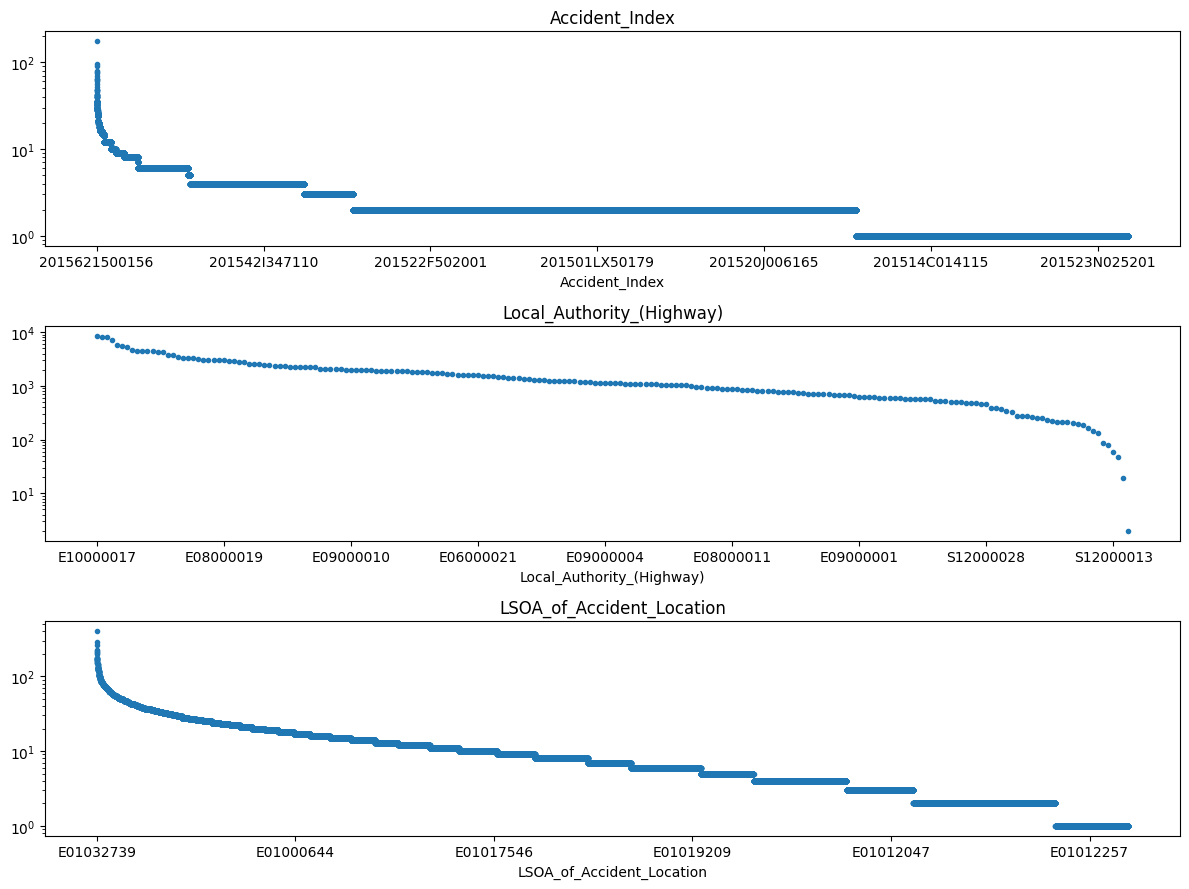

In [30]:
import matplotlib.pyplot as plt

# Create figure object with 3 subplots
fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(12, 9))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_non_numerical.columns, axes.ravel()):

    # Selects one single feature and counts number of occurrences per unique value
    df_non_numerical[col].value_counts().plot(

        # Plots this information in a figure with log-scaled y-axis
        logy=True, title=col, lw=0, marker=".", ax=ax)
    
plt.tight_layout()

__Observation 6__  
We can see that the most frequent accident (i.e. Accident_Index), had more than 100 people involved. Digging a bit deeper (i.e. looking at the individual features of this accident), we could identify that this accident happened on January 24th, 2015 at 11:55 in Cardiff UK. A quick internet search reveals that this entry corresponds to a luckily non-lethal accident including a minibus full of pensioners.

__Decision 6__  
The decision for what should be done with such rather unique entries is once more left in the the subjective hands of the person analyzing the dataset. Without any good justification for WHY, and only with the intention to show you the HOW - let’s go ahead and remove the 10 most frequent accidents from this dataset.

In [31]:
# Collect entry values of the 10 most frequent accidents
accident_ids = df_non_numerical["Accident_Index"].value_counts().head(10).index
accident_ids

Index(['2015621500156', '201597AC70404', '2015984141415', '201522D501706',
       '201501RY10259', '201542I309809', '2015160C06511', '2015300013662',
       '20154100T3095', '2015521501170'],
      dtype='object', name='Accident_Index')

In [32]:
# Removes accidents from the 'accident_ids' list
df_X = df_X[~df_X["Accident_Index"].isin(accident_ids)]
df_X.shape

(317659, 61)

# 4. Advanced EDA - Dataset Content

1. Feature distribution

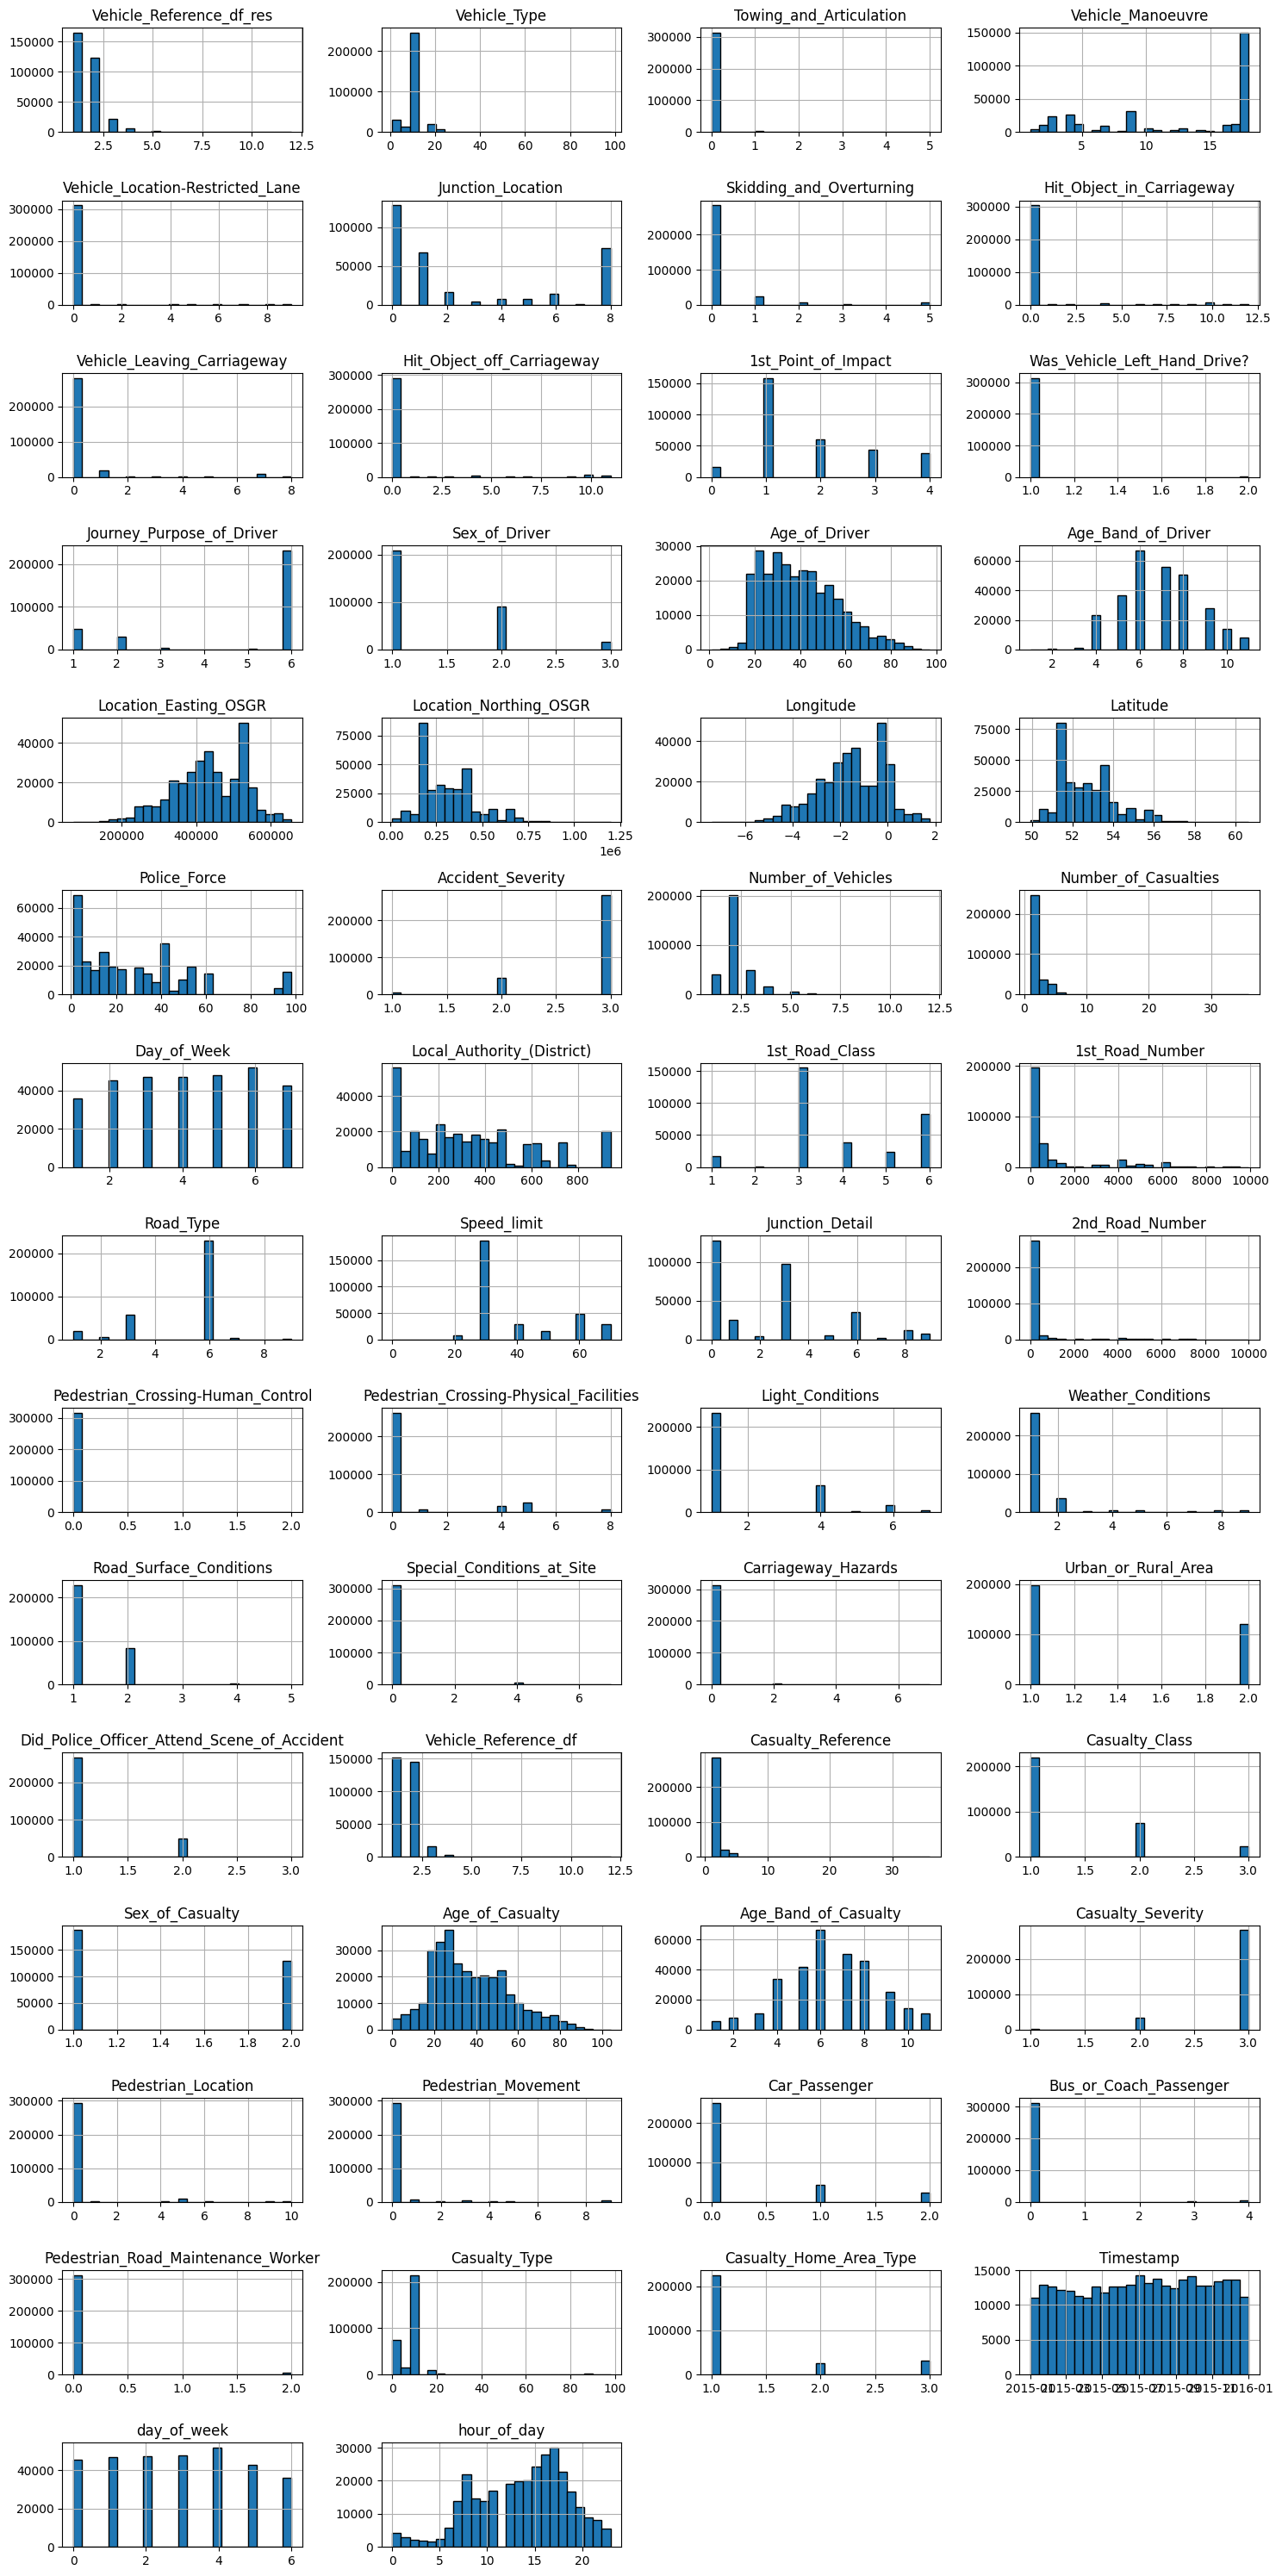

In [33]:
import matplotlib.pyplot as plt

# Plots the histogram for each numerical feature in a separate subplot
df_X.hist(bins=25, figsize=(15, 30), layout=(-1, 4), edgecolor="black")
plt.tight_layout()

__Observation 1__

Many features, such as Towing_and_Articulation or Was_Vehicle_Left_Hand_Drive? contain mostly entries of just one category.

In [34]:
# Collects for each feature the most frequent entry
most_frequent_entry = df_X.mode()

# Checks for each entry if it contains the most frequent entry
df_freq = df_X.eq(most_frequent_entry.values, axis=1)

# Computes the mean of the 'is_most_frequent' occurrence
df_freq = df_freq.mean().sort_values(ascending=False)

# Show the 5 top features with the highest ratio of singular value content
df_freq.head()

Pedestrian_Crossing-Human_Control    0.995155
Was_Vehicle_Left_Hand_Drive?         0.990336
Carriageway_Hazards                  0.983548
Towing_and_Articulation              0.983073
Vehicle_Location-Restricted_Lane     0.981943
dtype: float64

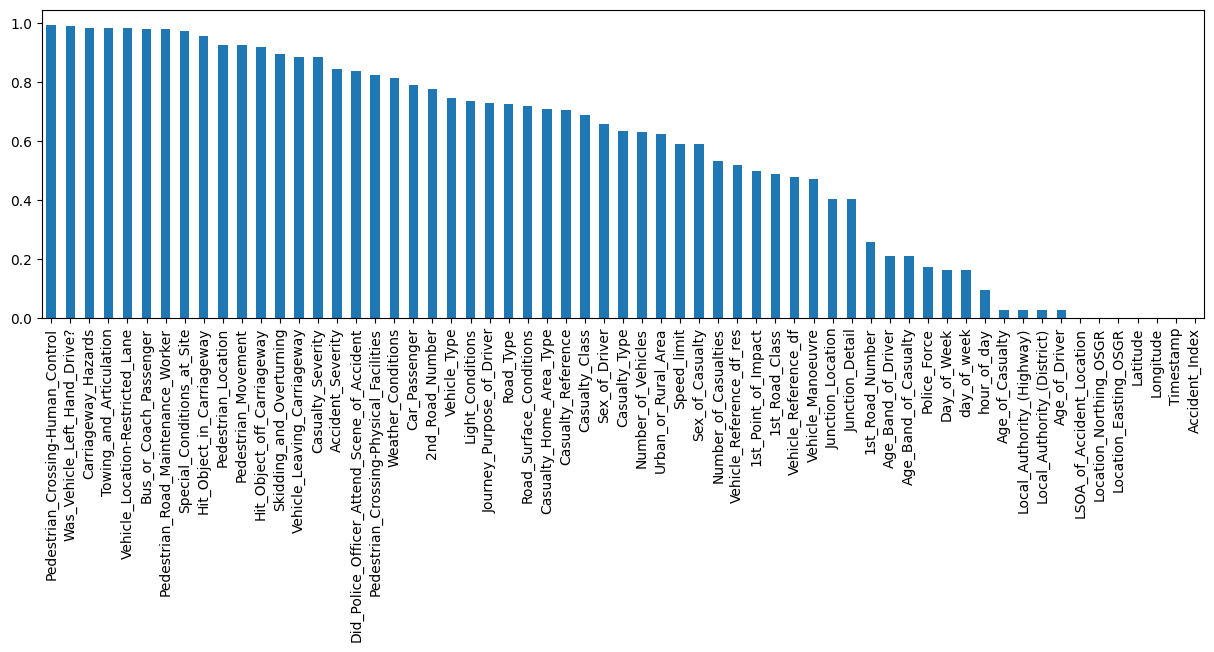

In [35]:
df_freq.plot.bar(figsize=(15, 4));

__Decision 1__  
This is once more a very subjective decision, but let’s say we decided to remove any feature where the most frequent element occurs more than 99% of the time. The intention behind this decision is as follows: Features where less than 1% of all values are not the same as the majority, might not really add much more additional information to the general dataset and can be removed.
  
This can be seen in the case of Was_Vehicle_Left_Hand_Drive?. In less than 1% of all accidents was the driver of the vehicle on the left side. While the side of driver is certainly an important feature to consider when investigating road safety in UK - in this particular case it doesn’t seem to be very prominent.
  
However, before we can remove this feature, we also need to make sure to first remove the non-majority entries. This can be done with the following command.

In [36]:
# Shape of feature matrix before cleaning
print("Shape before cleaning:", df_X.shape)

# Loop through the indices where 'most_frequent_ratio' is great than 99%
for col in df_freq[df_freq > 0.99].index:

    # Only keep entries that correspond to the majority value
    df_X = df_X[df_X[col].isin(most_frequent_entry[col])]

    #  Remove feature
    df_X = df_X.drop(columns=col)

# Shape of feature matrix after cleaning
print("Shape after cleaning:", df_X.shape)

Shape before cleaning: (317659, 61)
Shape after cleaning: (313061, 59)


__Observation 2__  
Going back to the multi-histogram-plot from before, let’s take a closer look at two more interesting features: Age_of_Driver and hour_of_day.

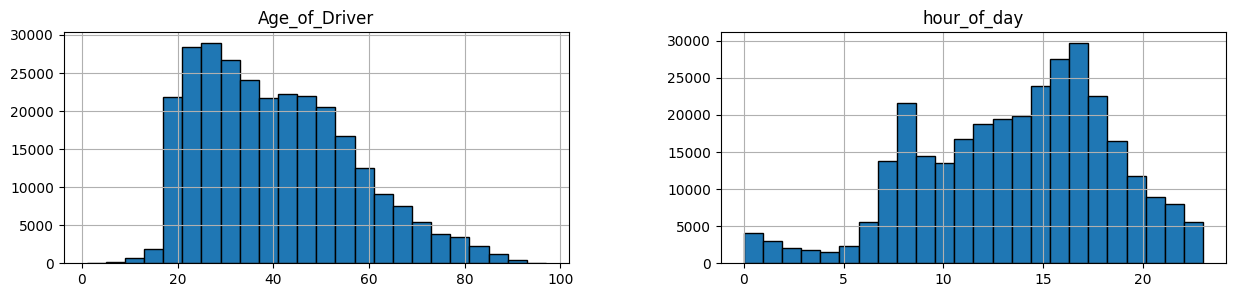

In [37]:
# Show histogram of two particular features
df_X[["Age_of_Driver", "hour_of_day"]].hist(
    bins=24, figsize=(15, 3), layout=(-1, 2), edgecolor="black");

In both cases we can observe unique value distributions. In the case of `Age_of_Driver`, there seems to be a strong drop of drivers younger than 16 years of age (i.e. the lowest age a person can legally drive in the UK). And in the case of `hour_of_day`, we can clearly see that different times of the day show different accident rates.

__Decision 2__  
With respect to Age_of_Driver, let’s subjectively assume that drivers younger than 16 years of age are unusual cases and should be removed from the dataset.

In [38]:
# Remove driver younger than 16 years of age
df_X = df_X[~df_X["Age_of_Driver"].lt(16)]
df_X.shape

(311175, 59)

With respect to hour_of_day, let’s go ahead and create five new features corresponding to the time periods:
- night: from 0 to 6
- morning: from 6 to 11
- lunch: from 11 to 14
- afternoon: from 14 to 19
- evening: from 19 to 24


In [39]:
# Establish new feature name and value boundaries
new_features = {
    "night": [0, 6],
    "morning": [6, 11],
    "lunch": [11, 14],
    "afternoon": [14, 19],
    "evening": [19, 24],
}

# Loop through new features and add them to the feature matrix
for key, value in new_features.items():
    df_X[key] = np.logical_and(
        df_X["hour_of_day"] >= value[0], df_X["hour_of_day"] < value[1]
    ).astype("int")

df_X.shape

(311175, 64)

2. Missing values

In [40]:
# Show the top few missing values
df_X.isna().sum().sort_values(ascending=False).head(5)

Casualty_Home_Area_Type      35334
Age_of_Driver                31428
Age_Band_of_Driver           31428
LSOA_of_Accident_Location    20419
Age_of_Casualty               4962
dtype: int64

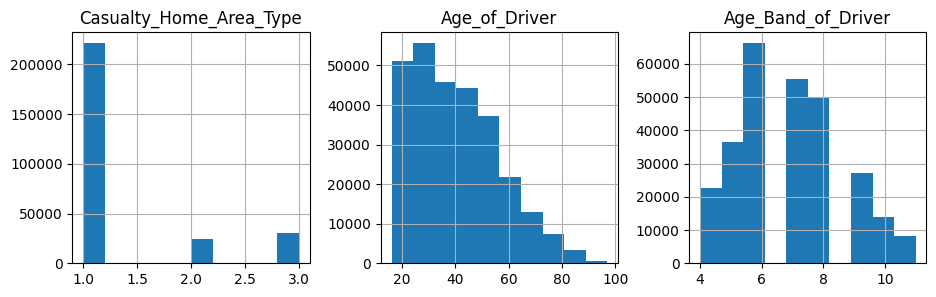

In [41]:
df_X[["Casualty_Home_Area_Type", "Age_of_Driver",
      "Age_Band_of_Driver", "LSOA_of_Accident_Location"]].hist(
    layout=(-1, 4), figsize=(15, 3));

__Observation 3__

Even though we asked to plot 4 features, it only shows three. Let’s check the content of the fourth entry:

In [42]:
df_X["LSOA_of_Accident_Location"]

0         E01002825
1         E01002820
2         E01002833
3         E01002874
4         E01002814
            ...    
319751          NaN
319752          NaN
319753          NaN
319754          NaN
319755          NaN
Name: LSOA_of_Accident_Location, Length: 311175, dtype: object

As we can see, the data type of this feature is object, due to the fact that the entries are strings.

__Decision 3__  
One option to fill up missing values is to use the most frequent entry on the feature. However, in this particular case, using the most frequent location of the accident might not be the best solution.  
Another approach, for non-numerical features in particular, is to label the missing values with a string that indicates that those are missing values, e.g. 'NaN', 'Missing', 'None'.

In [43]:
# Select non-numerical columns
non_numb_col = df_X.select_dtypes(include="object").columns

# Fill up missing values in non-numerical columns
df_X[non_numb_col] = df_X[non_numb_col].fillna("None")

# Check for remaining missing values
df_X[non_numb_col].isna().sum()

Accident_Index               0
Local_Authority_(Highway)    0
LSOA_of_Accident_Location    0
dtype: int64

__Observation 4__  
Filling up missing values for the numerical values is also not as straightforward as we would hope. Some of them show continuous distributions (that might be skewed), while other have only discrete values. The most frequent ways to fill up missing values of numerical features use either the mode() (i.e. most frequent entry), the mean() or the median() (in particular for skewed continuous distributions).

__Decision 4__  
Having said so, let’s keep it simple for this unit and decide that we fill up missing values with the most frequent entry if the feature has less than 25 unique features and otherwise fill it up with the median value.

In [44]:
# Extract columns to fill up
cols = df_X.columns[df_X.isna().sum() != 0]

# Loop through each column and fill up with missing values
cols_median = df_X[cols].nunique() >= 25

# Fill discrete entries with most frequent entry
df_X[cols[~cols_median]] = df_X[cols[~cols_median]].fillna(
    df_X[cols[~cols_median]].mode().T[0])

# Fill continuous features with median value
df_X[cols[cols_median]] = df_X[cols[cols_median]].fillna(
    df_X[cols[cols_median]].median(numeric_only=True))

In [45]:
# Show the top few missing values
df_X.isna().sum().sort_values(ascending=False).head(5)

Timestamp               43
Accident_Index           0
Age_Band_of_Casualty     0
Light_Conditions         0
Weather_Conditions       0
dtype: int64

__Observation 5__  
The only thing remaining are missing value on the Timestamp feature.

__Decision 5__  
Assuming that the raw dataset was chronologically ordered, we can just go ahead and fill up these missing values with a forward and backward fill.

In [50]:
df_X["Timestamp"] = df_X["Timestamp"].fillna(method="ffill").fillna(method="bfill")

/tmp/ipykernel_11868/255777139.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_X["Timestamp"] = df_X["Timestamp"].fillna(method="ffill").fillna(method="bfill")


3. Feature patterns

Next step on the list is the investigation of each feature individually. The goal of this part is two fold:
- Can we identify particular patterns within a feature that will help us to decide if some entries need to be dropped or modified?
- Can we identify particular relationships between features that will help us to better understand our features?


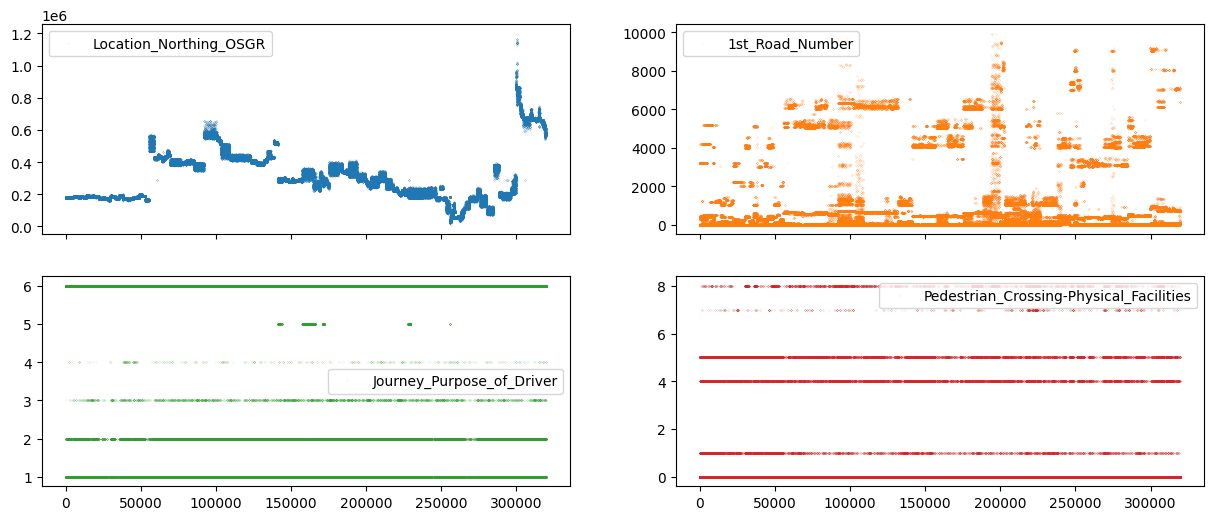

In [51]:
df_X[["Location_Northing_OSGR", "1st_Road_Number",
      "Journey_Purpose_of_Driver", "Pedestrian_Crossing-Physical_Facilities"]].plot(
    lw=0, marker=".", subplots=True, layout=(-1, 2), markersize=0.1, figsize=(15, 6));

In [52]:
# Creates mask to identify numerical features with more or less than 25 unique features
cols_continuous = df_X.select_dtypes(include="number").nunique() >= 25

3.1 Continuous features

In [53]:
# Create a new dataframe which only contains the continuous features
df_continuous = df_X[cols_continuous[cols_continuous].index]
df_continuous.shape

(311175, 11)

/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/miguel/.pyenv/versions/3.9/envs/epfl_extension_school/lib/python3.9/site-packages/seaborn/_

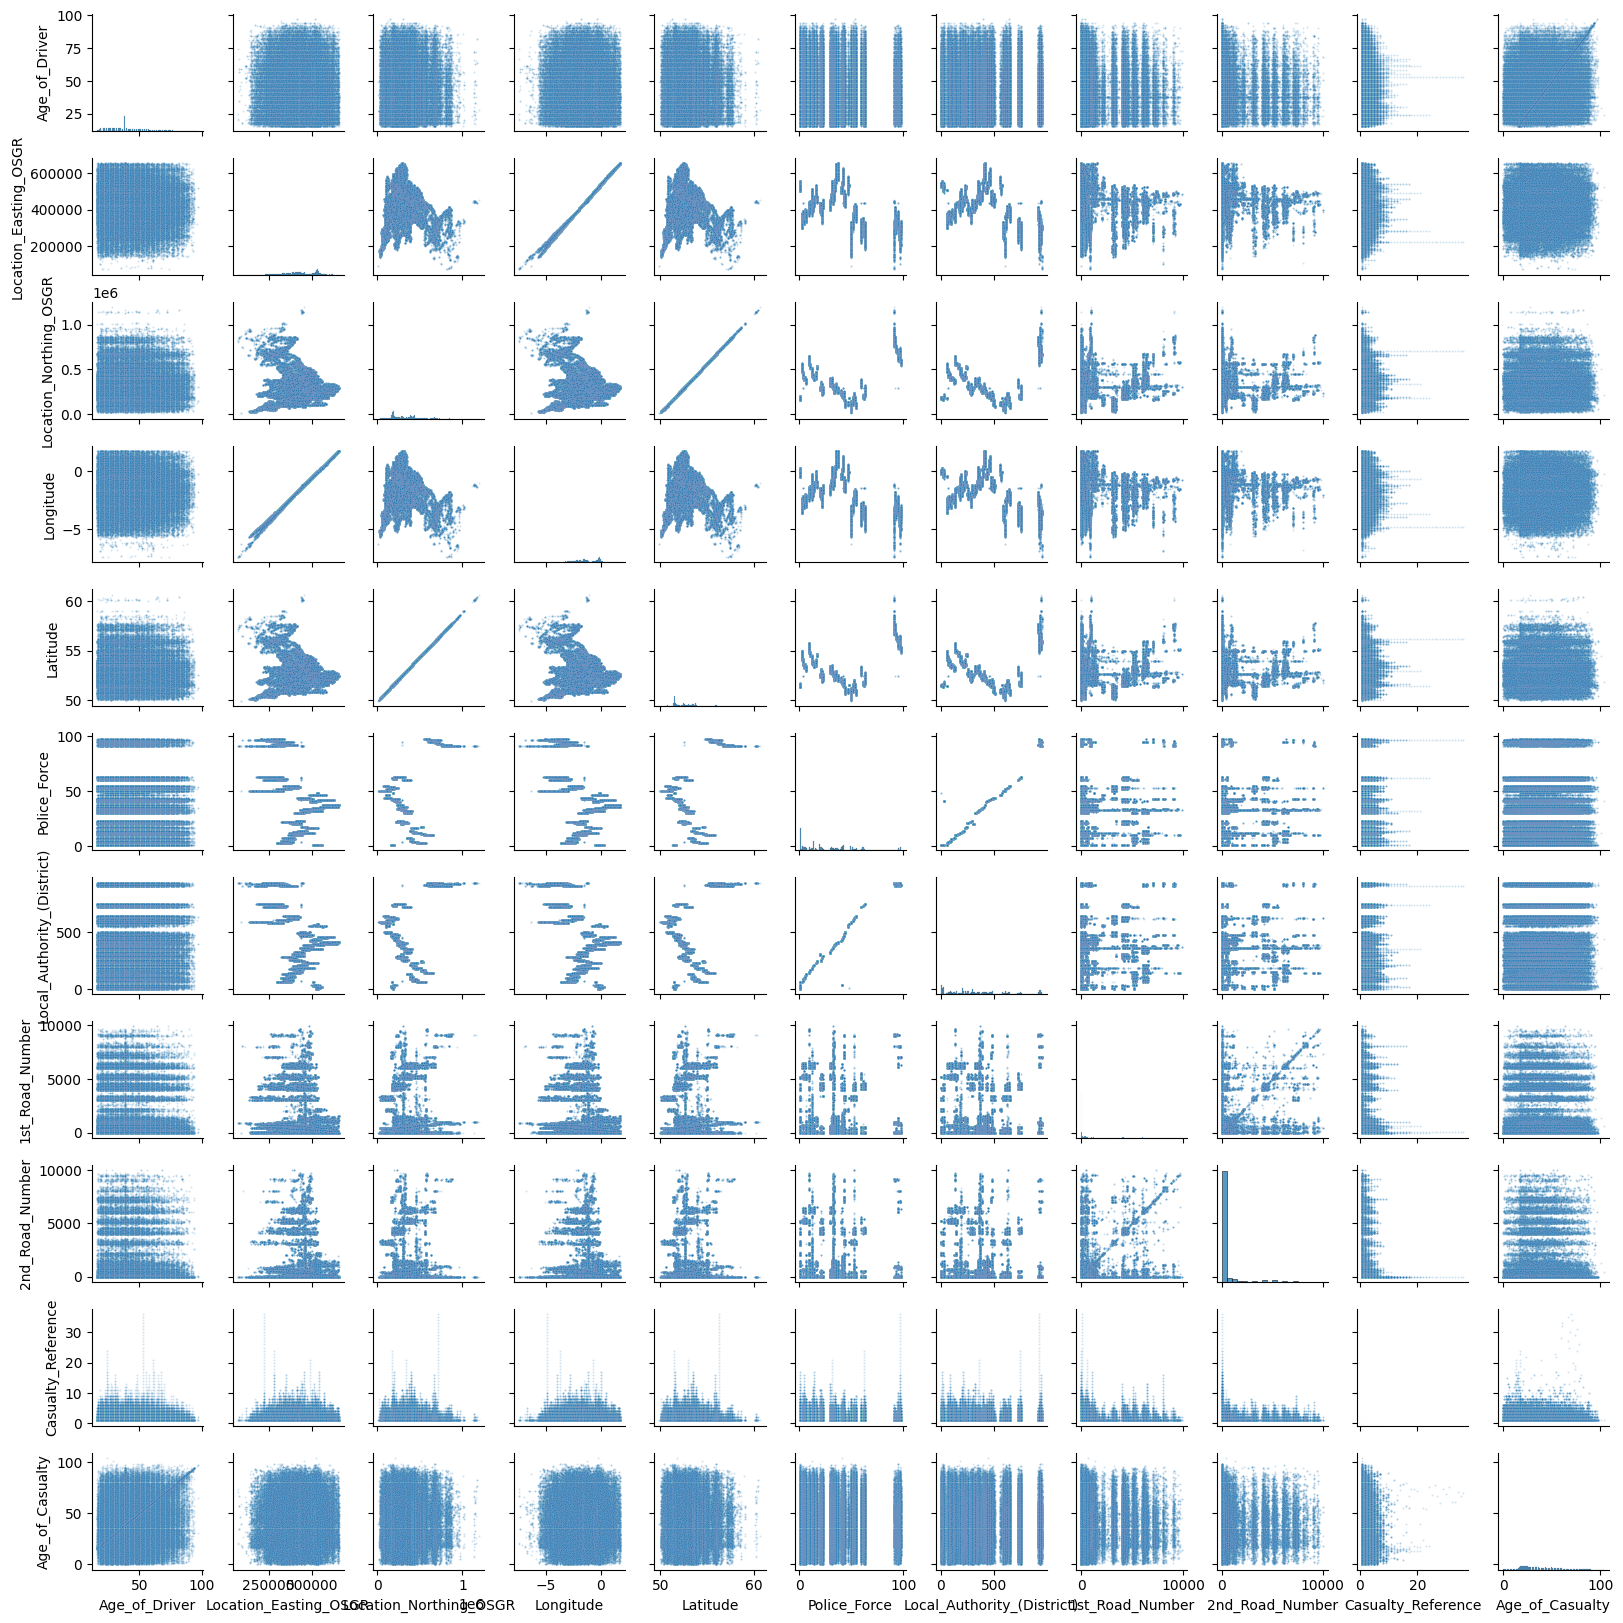

In [54]:
import seaborn as sns

sns.pairplot(df_continuous, height=1.5, plot_kws={"s": 2, "alpha": 0.2});

__Observation 6__

There seems to be a strange relationship between a few features in the top left corner. Location_Easting_OSGR and Longitude, as well as Location_Northing_OSGR and Latitude seem to have a very strong linear relationship. And together each of these two pairs display the map of the United Kingdom.

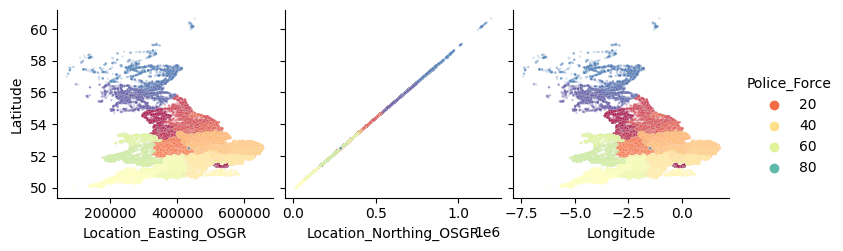

In [57]:
sns.pairplot(
    df_X,
    plot_kws={"s": 3, "alpha": 0.2},
    hue="Police_Force",
    palette="Spectral",
    x_vars=["Location_Easting_OSGR", "Location_Northing_OSGR", "Longitude"],
    y_vars="Latitude",
);

__Decision 6__  
Knowing that these features contain geographic information, a more in-depth EDA with regards to geolocation could be fruitful. However, for now we will leave this on the side and remove these four features for the further investigation of the continuous features.

__Observation 7__  
While there are many more interesting patterns visible in the pairplot above, let’s focus on the two features `Age_of_Driver` and `Age_of_Casulaty`. And to showcase an additional seaborn routine, let’s use PairGrid() for some more advanced plotting. Note, for a great alternative to PairGrid, see also seaborn’s FacetGrid.

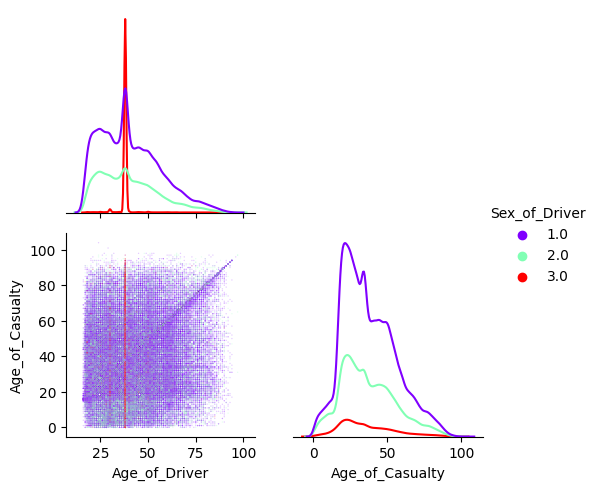

In [59]:
col_vars = ["Age_of_Driver", "Age_of_Casualty"]

# Specify which feature should be chosen to color the plot
col_color = "Sex_of_Driver"

#  Use PairGrid to plot features
g = sns.PairGrid(
    df_X,
    diag_sharey=False,
    corner=True,
    hue=col_color,
    x_vars=col_vars,
    y_vars=col_vars,
    palette="rainbow",
)
g.map_lower(sns.scatterplot, s=1, alpha=0.2)
g.map_diag(sns.kdeplot)
g.add_legend();

Interesting, it seems that all drivers with a Sex of 3.0 have almost exactly the same age. This might either be due to the original dataset or something we did to it (e.g. filling up of missing values). So let’s plot the figure once more, but instead of `df_X`, let’s use the raw dataframe `dataset["frame"]`:

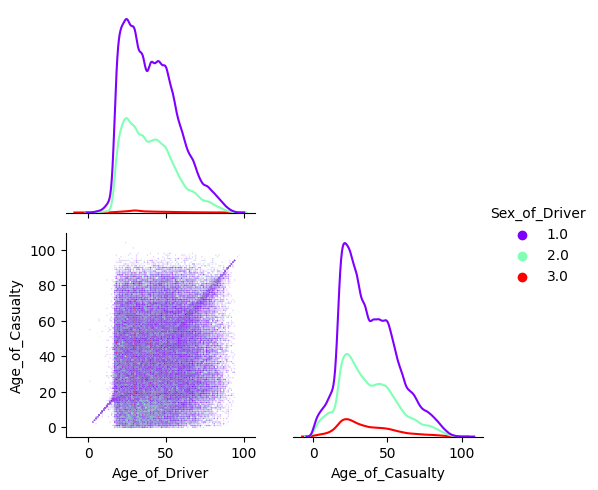

In [60]:
#  Use PairGrid to plot features
g = sns.PairGrid(
    dataset["frame"],
    diag_sharey=False,
    corner=True,
    hue=col_color,
    x_vars=col_vars,
    y_vars=col_vars,
    palette="rainbow",
)
g.map_lower(sns.scatterplot, s=1, alpha=0.2)
g.map_diag(sns.kdeplot)
g.add_legend();

__Decision 7__  
It seems that we introduce the source of this strange pattern ourselves. Ideally we would now iterate on what we did, look for the exact source of this bias and correct it in the code above. For this use case we will leave things as they are, otherwise we cannot show you this particularity.  
The investigation of the continuous features could of course continue for a long time. But in the interest of time, let’s stop here.

__3.2. Discrete and ordinal features__

Finding patterns in the discrete or ordinal features is a bit more tricky. But also here, some quick pandas and seaborn trickery can help us to get a general overview of our dataset. First, let’s select the columns we want to investigate.

In [61]:
# Create a new dataframe which doesn't contain the numerical continuous features
df_discrete = df_X[cols_continuous[~cols_continuous].index]
df_discrete.shape

(311175, 49)

In [62]:
# Establish number of columns and rows needed to plot all features
n_cols = 5
n_elements = len(df_discrete.columns)
n_rows = np.ceil(n_elements / n_cols).astype("int")
print(n_cols, n_rows)

5 10


In [63]:
# Specify y_value (ideally a continuous feature)
y_value = df_X["Age_of_Driver"]

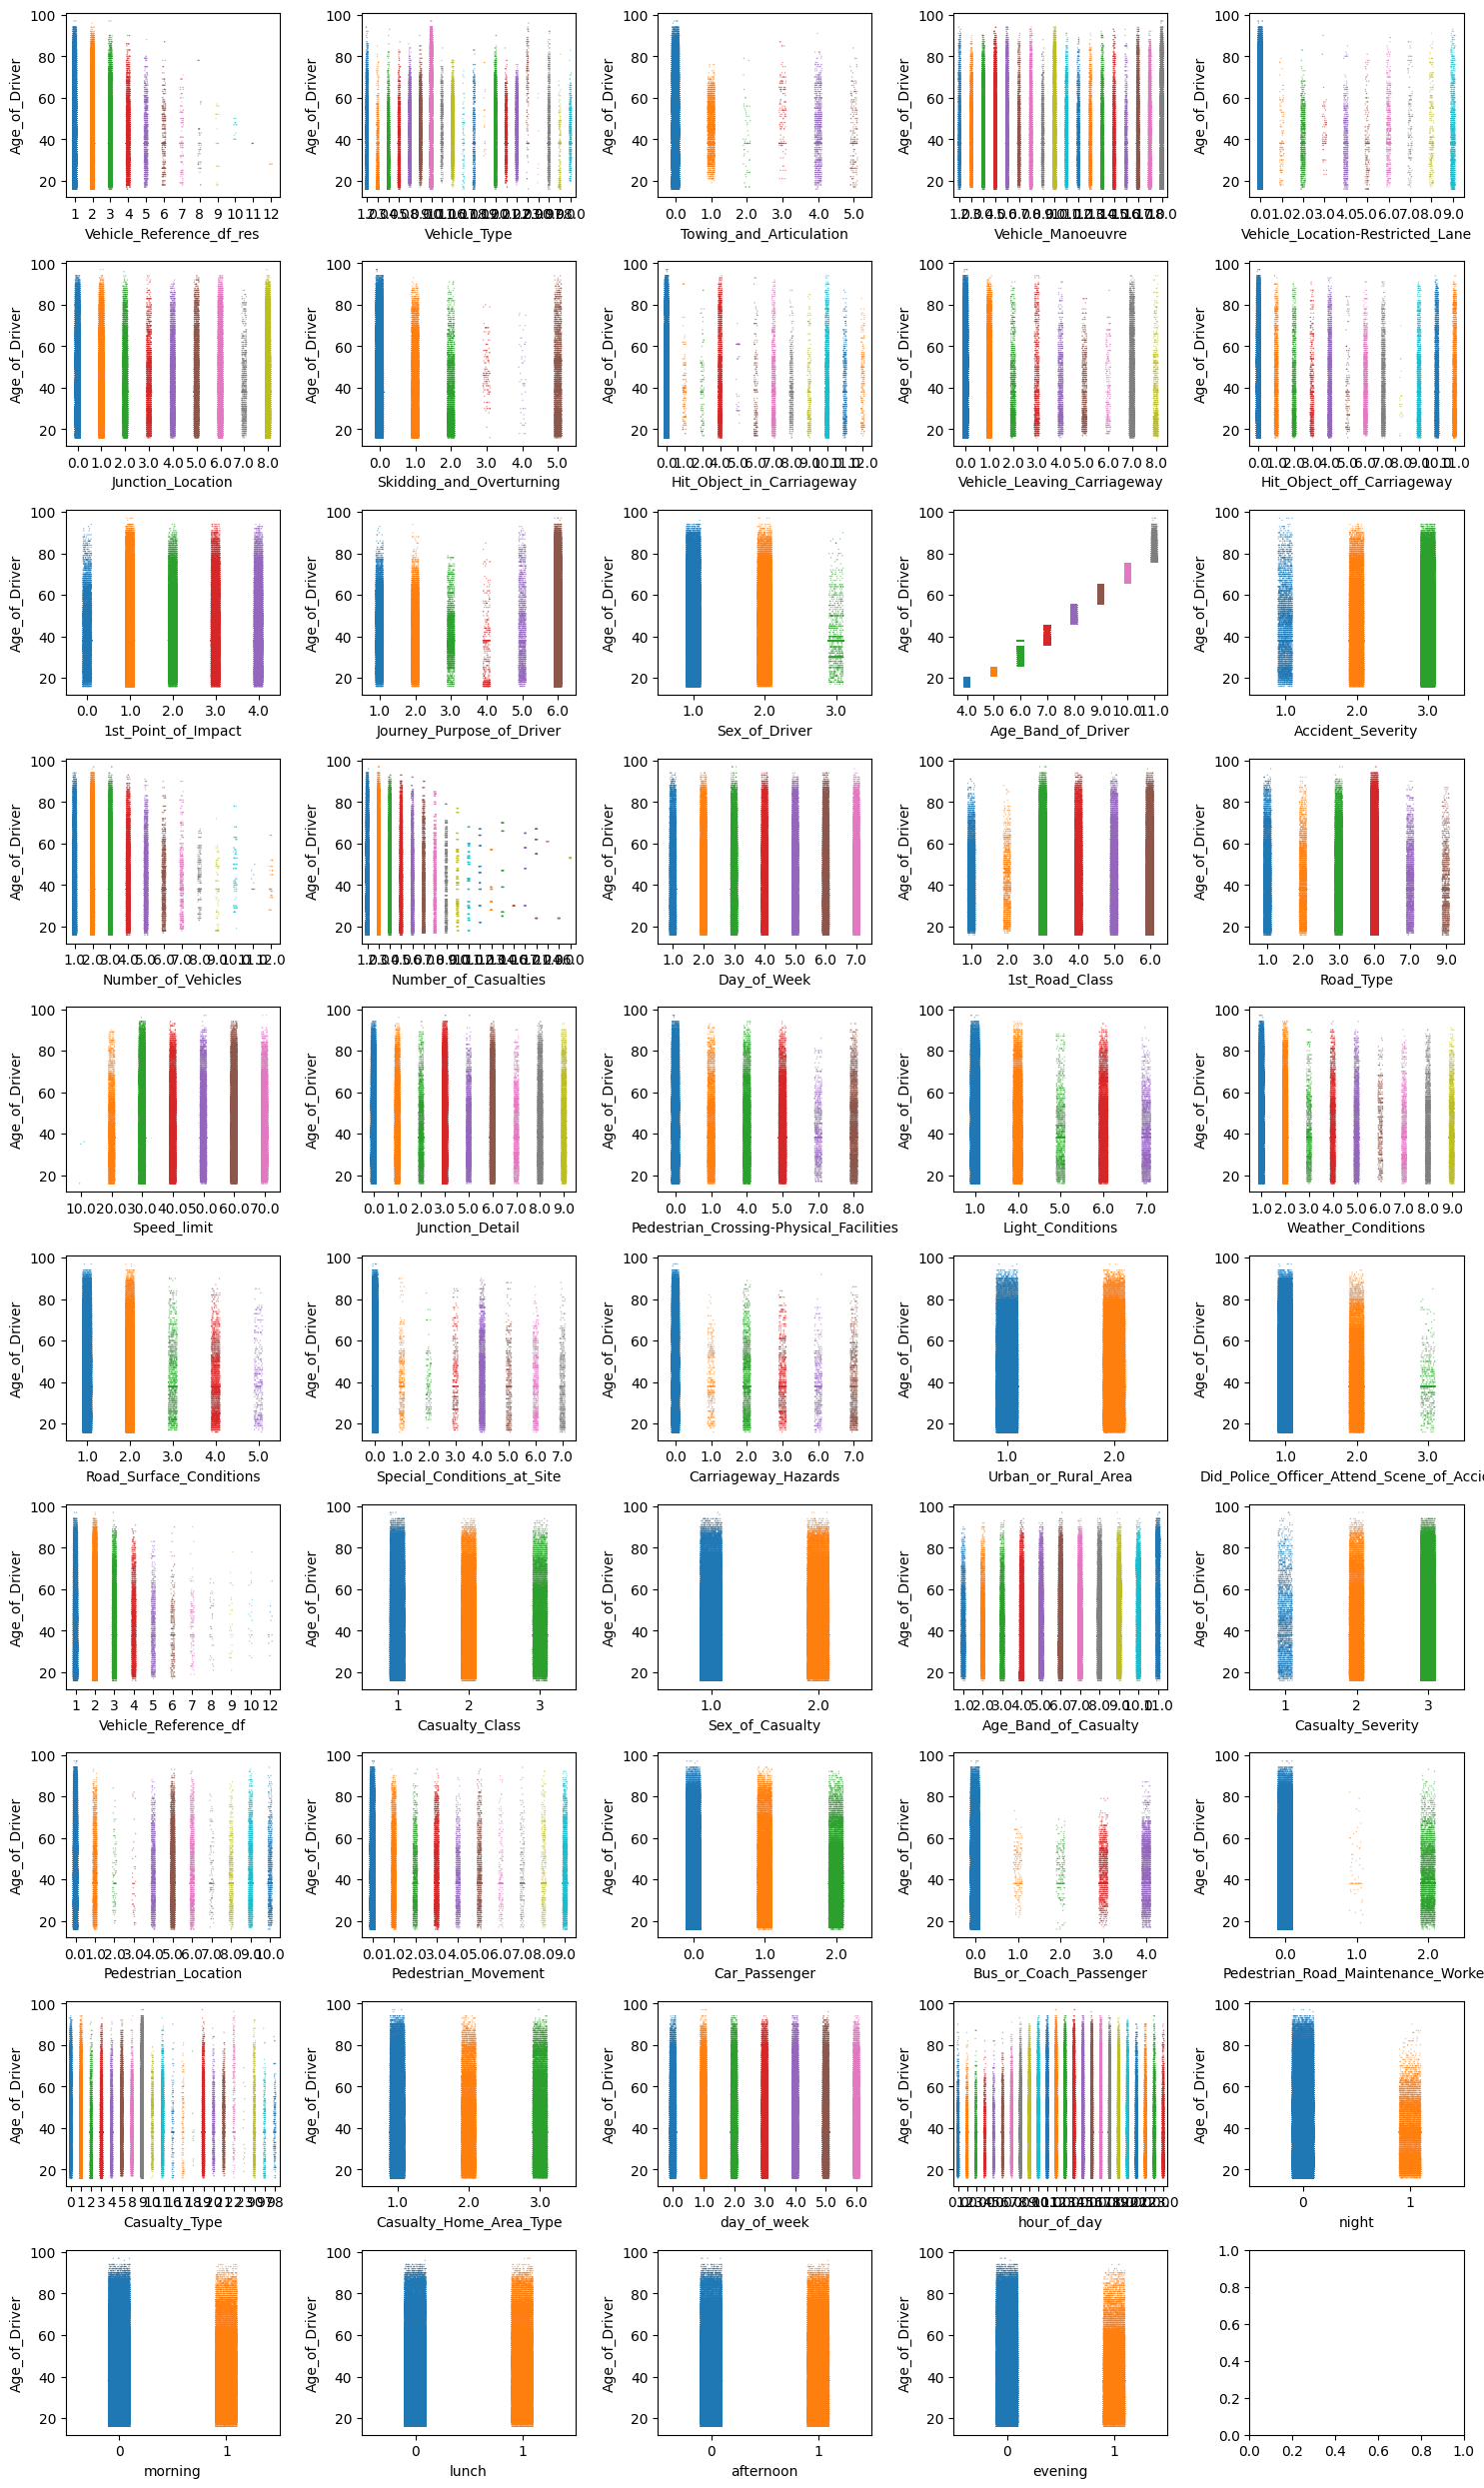

In [64]:
# Create figure object with as many rows and columns as needed
fig, axes = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(15, n_rows * 2.5))

# Loop through features and put each subplot on a matplotlib axis object
for col, ax in zip(df_discrete.columns, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=y_value, ax=ax, palette="tab10", size=1, alpha=0.5)
plt.tight_layout()

__Observations 8__  
There are too many things to investigate here, so let’s just focus on a few. In particular, let’s focus on 6 features where some of the values appear less frequent than the rest. And to shake things up a bit, let’s use Longitude on the y-axis.

In [65]:
# Specify features of interest
selected_features = ["Vehicle_Reference_df_res", "Towing_and_Articulation",
                     "Skidding_and_Overturning", "Bus_or_Coach_Passenger",
                     "Pedestrian_Road_Maintenance_Worker", "night"]

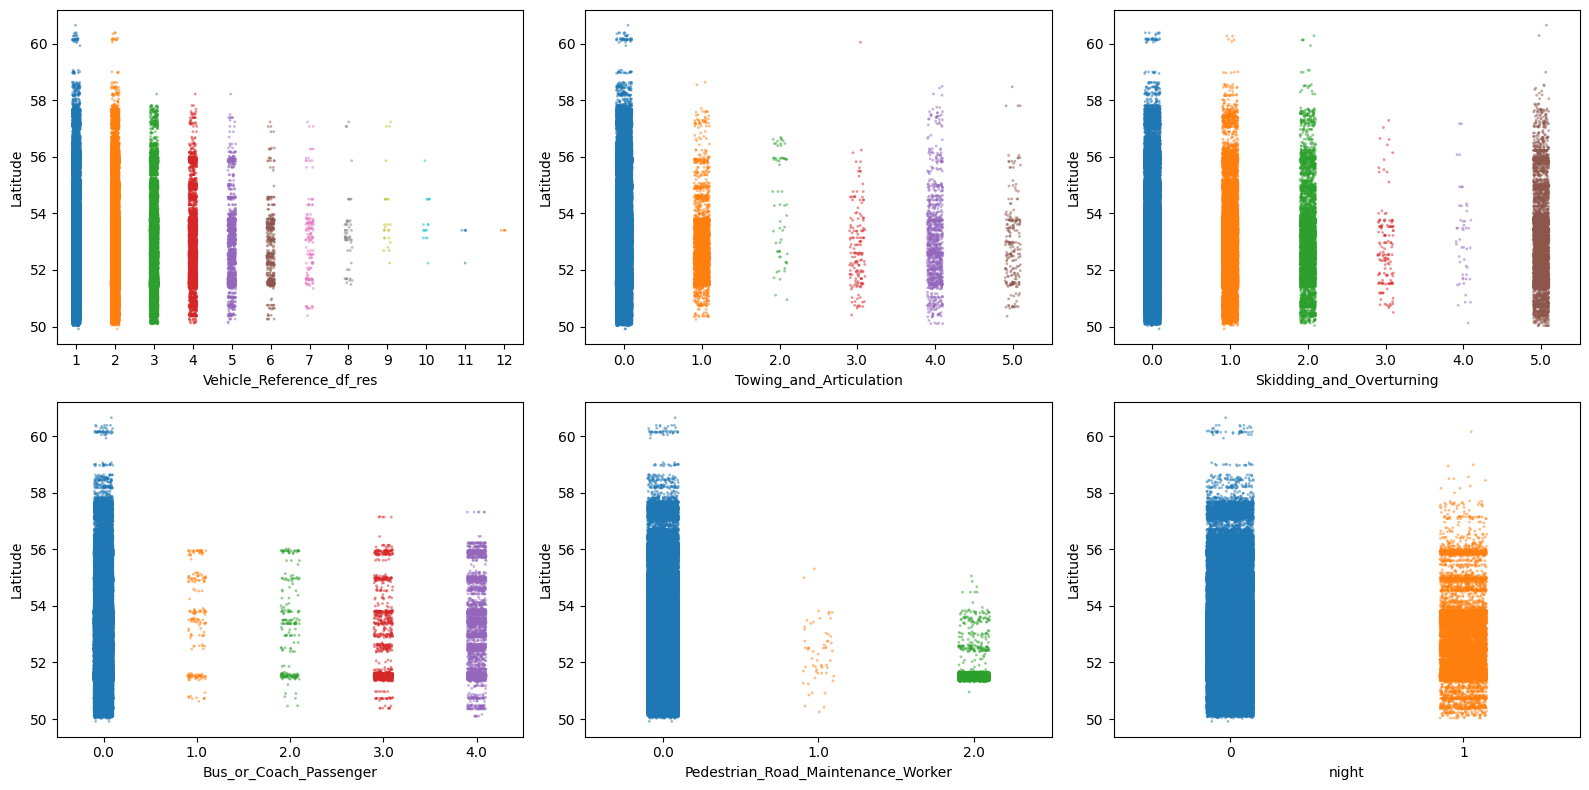

In [66]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.stripplot(data=df_X, x=col, y=df_X["Latitude"], ax=ax, palette="tab10", size=2, alpha=0.5)
plt.tight_layout()

__Decision 8__  
If the purpose of the dataset is to prepare it for a later data science project, then it might be useful to remove discrete entries that only appear a few times. Given that an intended machine learning model might not be able to learn the the nuanced characteristics associated with these entries. If that would be our intention, we could probably remove entries with Vehicle_Reference_df_res values above ~7 or Skidding_and_Overturning values of 3 or 4 or Pedestrian_Road_Maintenance_Worker values of 1.  
Also, some features seem to have more feature just below the 52nd Latitude, let’s check this a bit closer with a violineplot. And to go a step further, let’s also separate each visualization by Urban_or_Rural_Area.

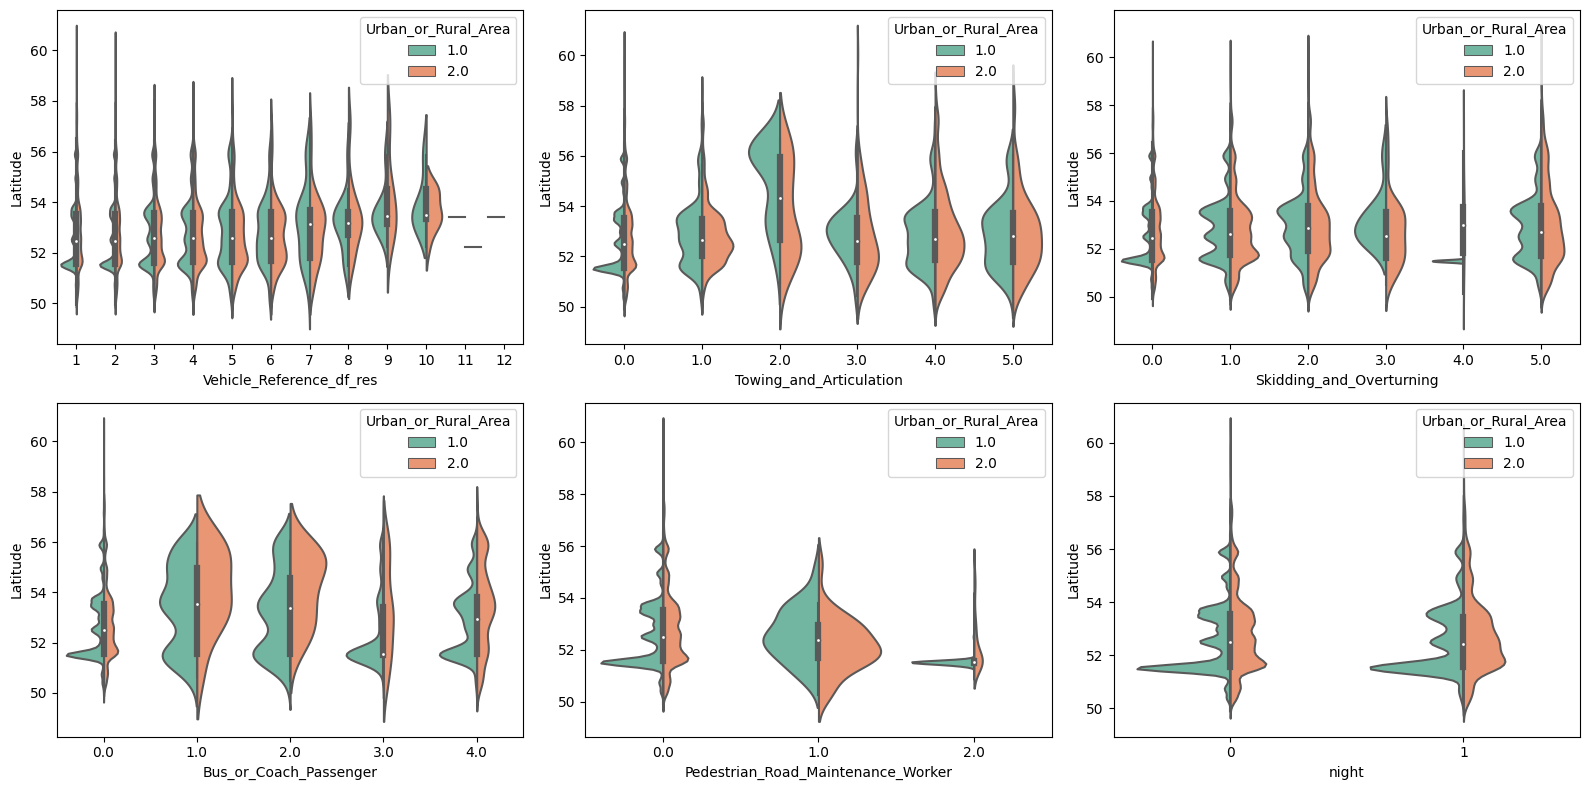

In [67]:
# Create a figure with 3 x 2 subplots
fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16, 8))

# Loop through these features and plot entries from each feature against `Latitude`
for col, ax in zip(selected_features, axes.ravel()):
    sns.violinplot(
        data=df_X,
        x=col,
        y=df_X["Latitude"],
        ax=ax,
        palette="Set2",
        split=True,
        hue="Urban_or_Rural_Area",
    )
plt.tight_layout()

Interesting! We can see that some values on features are more frequent in urban, than in rural areas (and vice versa). Furthermore, as suspected, there seems to be a peak of value entries at latitude 51.5. Which is very likely due to the data recording from London, which is situated 51.5074° north.

__4. Feature relationships__  
Last, but not least, let’s take a look at relationships between features. More precisely how they correlate. The most direct approach is to use pandas’ corr() function. So let’s go ahead and compute the feature to feature correlation.

In [69]:
len(df_X.columns)

64

In [70]:
df_corr = df_X.corr(method="pearson", numeric_only=True)
df_corr.round(3)

Vehicle_Reference_df_res  \
Vehicle_Reference_df_res                                        1.000   
Vehicle_Type                                                    0.013   
Towing_and_Articulation                                         0.005   
Vehicle_Manoeuvre                                              -0.128   
Vehicle_Location-Restricted_Lane                               -0.013   
Junction_Location                                              -0.078   
Skidding_and_Overturning                                       -0.105   
Hit_Object_in_Carriageway                                      -0.074   
Vehicle_Leaving_Carriageway                                    -0.106   
Hit_Object_off_Carriageway                                     -0.110   
1st_Point_of_Impact                                             0.021   
Journey_Purpose_of_Driver                                       0.004   
Sex_of_Driver                                                   0.053   
Age_of_Driver                                                   0.034   
Age_Band_of_Driver                                              0.034   
Location_Easting_OSGR                                          -0.020   
Location_Northing_OSGR                                          0.008   
Longitude                                                      -0.020   
Latitude                                                        0.008   
Police_Force                                                    0.015   
Accident_Severity                                              -0.015   
Number_of_Vehicles                                              0.585   
Number_of_Casualties                                            0.184   
Day_of_Week                                                     0.007   
Local_Authority_(District)                                      0.019   
1st_Road_Class                                                 -0.125   
1st_Road_Number                                                -0.023   
Road_Type                                                      -0.060   
Speed_limit                                                     0.128   
Junction_Detail                                                -0.037   
2nd_Road_Number                                                -0.020   
Pedestrian_Crossing-Physical_Facilities                        -0.042   
Light_Conditions                                               -0.023   
Weather_Conditions                                             -0.014   
Road_Surface_Conditions                                        -0.008   
Special_Conditions_at_Site                                      0.011   
Carriageway_Hazards                                             0.006   
Urban_or_Rural_Area                                             0.072   
Did_Police_Officer_Attend_Scene_of_Accident                    -0.073   
Vehicle_Reference_df                                            0.295   
Casualty_Reference                                              0.140   
Casualty_Class                                                 -0.135   
Sex_of_Casualty                                                 0.016   
Age_of_Casualty                                                 0.025   
Age_Band_of_Casualty                                            0.032   
Casualty_Severity                                               0.027   
Pedestrian_Location                                            -0.164   
Pedestrian_Movement                                            -0.135   
Car_Passenger                                                   0.044   
Bus_or_Coach_Passenger                                         -0.034   
Pedestrian_Road_Maintenance_Worker                             -0.101   
Casualty_Type                                                   0.097   
Casualty_Home_Area_Type                                         0.010   
day_of_week                                                    -0.006   
hour_of_day                   

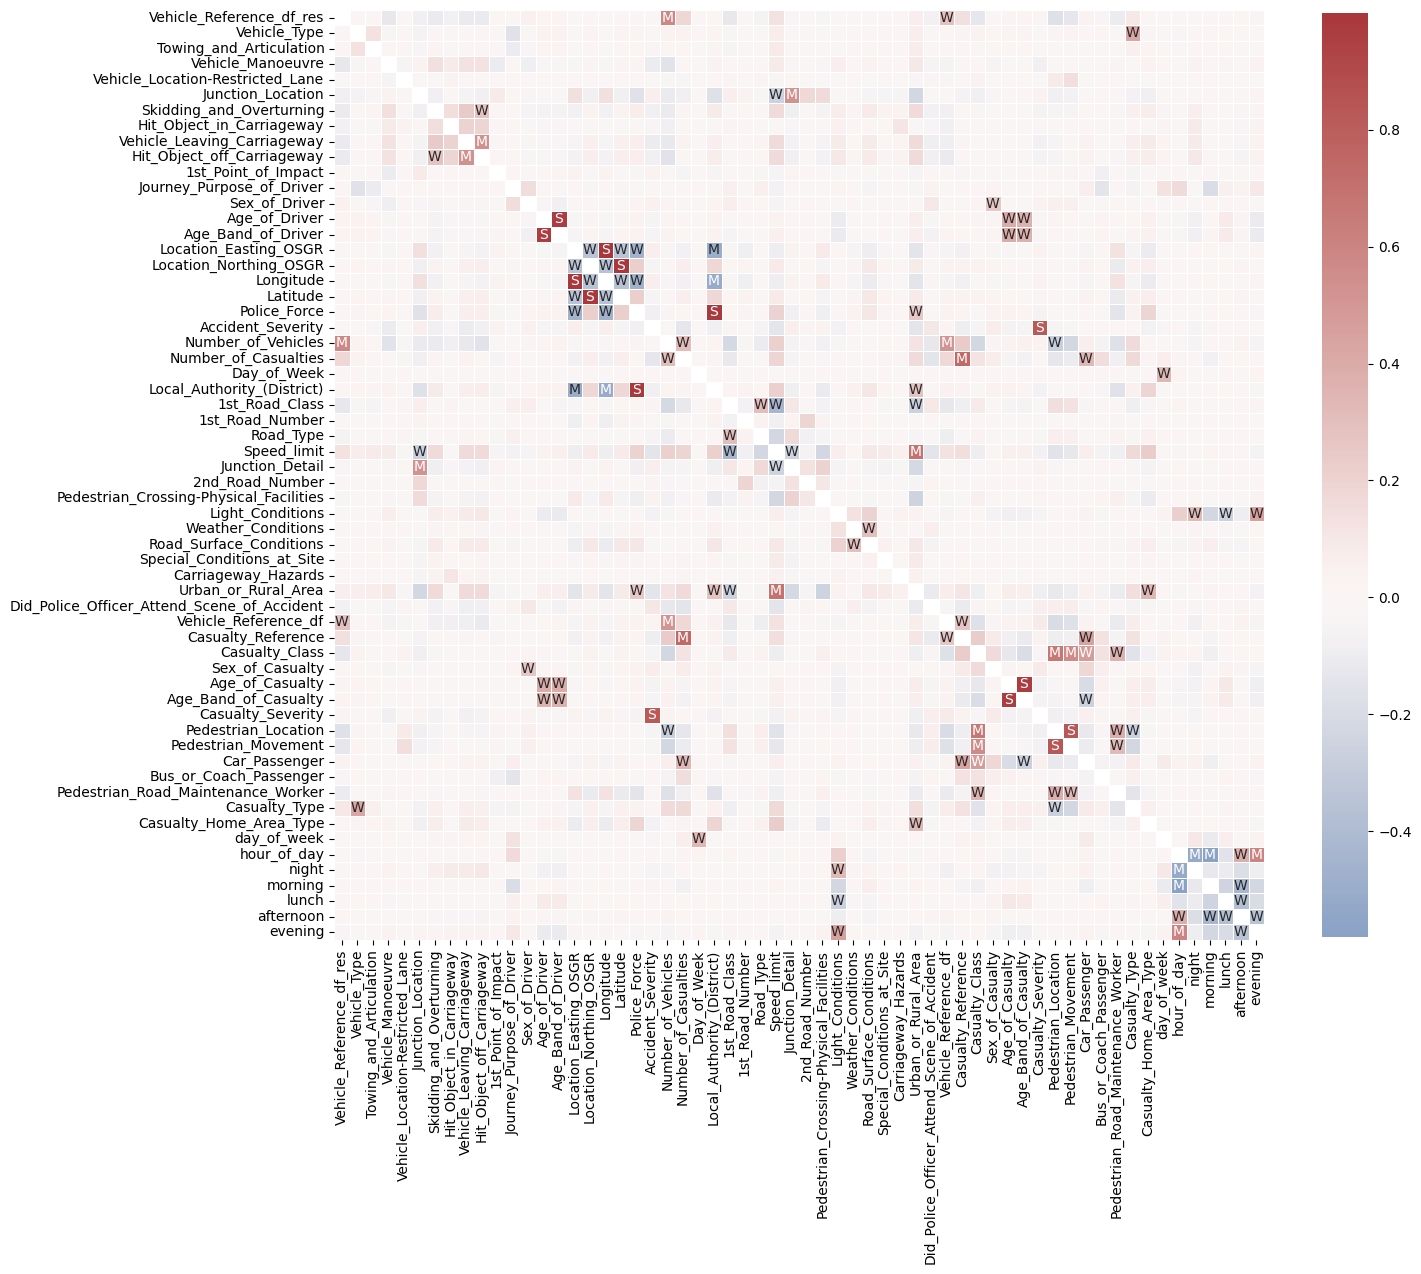

In [71]:
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.75,'S',
                  np.where(np.abs(df_corr)>0.5,'M',
                           np.where(np.abs(df_corr)>0.25,'W','')))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

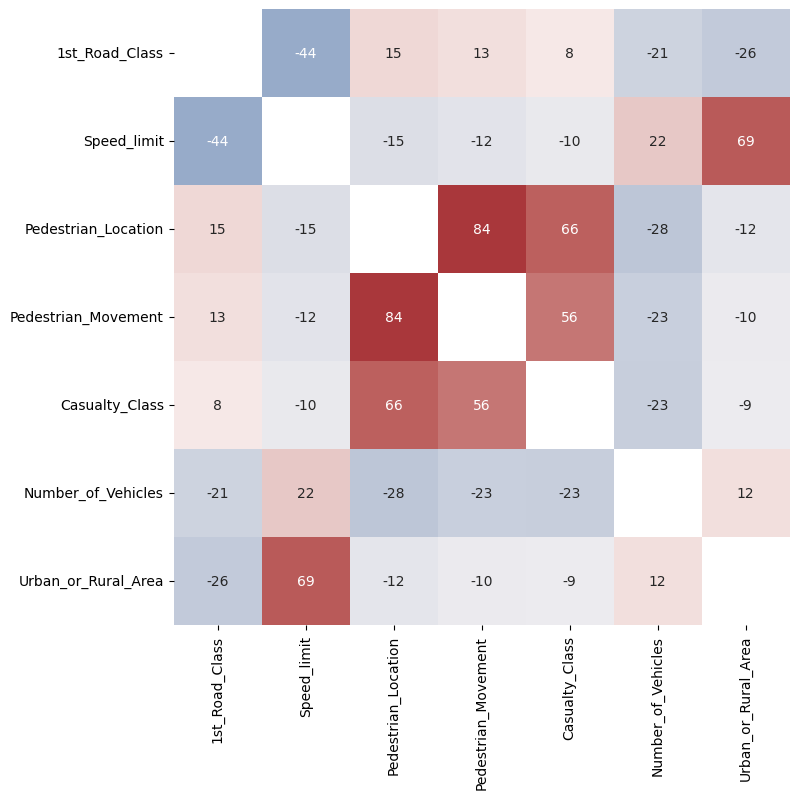

In [72]:
# Select which features to look at
features = ["1st_Road_Class", "Speed_limit", "Pedestrian_Location", "Pedestrian_Movement",
            "Casualty_Class", "Number_of_Vehicles", "Urban_or_Rural_Area"]

#  Redo correlation matrix (this time only on the selected features)
df_detail = df_X[features].corr(method="pearson")

# Plot the correlation matrix, with annotation and without colorbar
plt.figure(figsize=(8, 8))
sns.heatmap(df_detail * 100, annot=True, fmt=".0f", mask=np.eye(len(df_detail)),
            square=True, center=0, cmap="vlag", cbar=False);

Now, finding the right kind of features to look at is not always obvious. A great alternative to improve the pattern detection is to use seaborn’s `clustermap()`. This method tries to hierarchically cluster the heatmap, before plotting it. In other words, it tries to reorder the features in such a way that the entries that are similar to each other are clustered closely together.

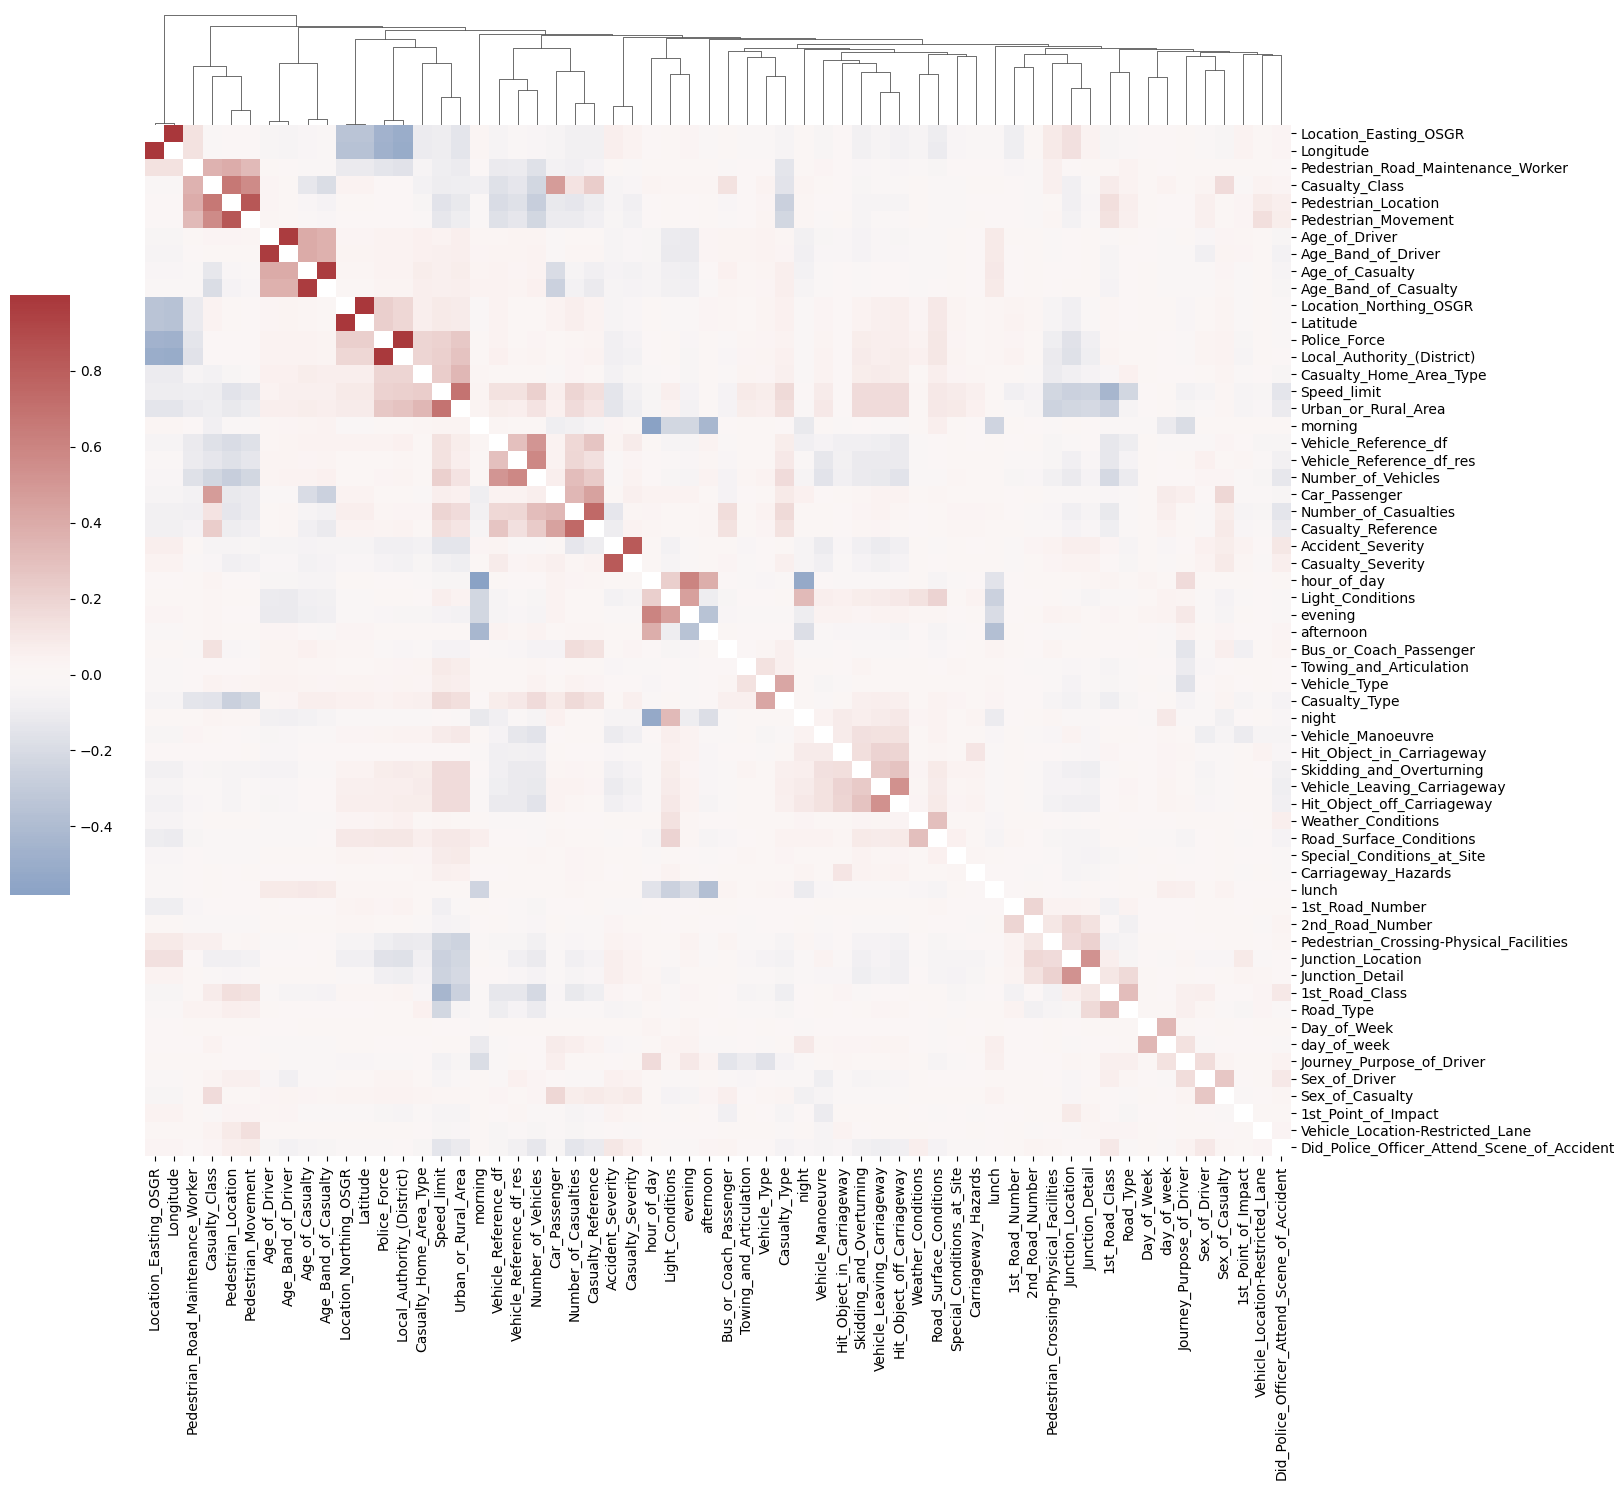

In [73]:
sns.clustermap(df_corr, mask=np.eye(len(df_corr)), center=0, cmap="vlag",
               cbar_pos=(-0.08, 0.4, 0.04, 0.4), dendrogram_ratio=(0, 0.1),
               figsize=(15, 15));

__Observation and decision 9__  
We can see that multiple features seem to cluster together. For some, such as hour of the day and morning, lunch or evening, it isn’t much of a surprise. But for other’s such as Number_of_Casualties and Casualty_Reference it is. Let’s plot these two features in a scatter plot.

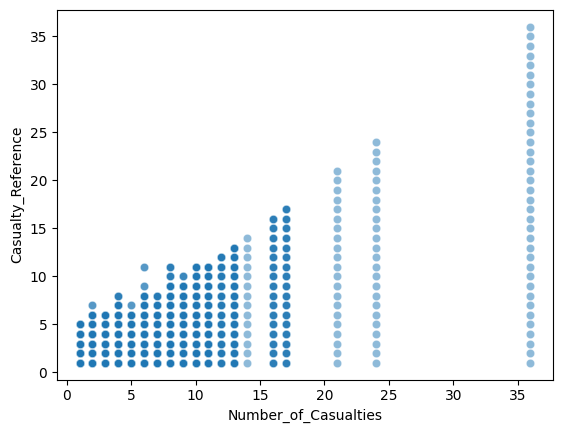

In [74]:
sns.scatterplot(data=df_X, x="Number_of_Casualties", y="Casualty_Reference", alpha=0.5);

This makes actually sense. The more casualties, the more references had to be recorded. What is curious is why some accidents seem to have more references than casualties.

If we would want to go down this rabbit hole, we could now identify which accidents have more references than casualties, with something like this:

In [75]:
# Per 'Accident_Index', select the maximum values in number of casualties and references
df_max = (
    df_X[["Accident_Index", "Number_of_Casualties", "Casualty_Reference"]]
    .groupby("Accident_Index")
    .max()
)
df_max.head()

Number_of_Casualties  Casualty_Reference
Accident_Index                                          
201501BS70001                    1.0                   1
201501BS70002                    1.0                   1
201501BS70004                    1.0                   1
201501BS70005                    1.0                   1
201501BS70008                    1.0                   1

In [76]:
df_max[df_max["Number_of_Casualties"] + 4 <= df_max["Casualty_Reference"]]

Number_of_Casualties  Casualty_Reference
Accident_Index                                          
2015300017172                    2.0                   7
2015621500756                    2.0                   6
2015621500919                    6.0                  11
2015621501509                    4.0                   8
2015621501715                    2.0                   6
2015621501780                    1.0                   5
2015621501854                    1.0                   5

For now, let’s leave things at where they are and let’s look at another, non-visual approach to investigate feature relations. To do this, we can just extract all the individual correlations between the features and sort them by their coefficient.

In [77]:
lower_triangle_mask = np.tril(np.ones(df_corr.shape), k=-1).astype("bool")
lower_triangle_mask

array([[False, False, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True, False, False],
       [ True,  True,  True, ...,  True,  True, False]])

In [78]:
df_corr_stacked = df_corr.where(lower_triangle_mask).stack().sort_values()

And as a final step, let’s now take a look at the 10 most anti-correlated features.

In [79]:
df_corr_stacked.head(10)

morning                     hour_of_day             -0.580871
night                       hour_of_day             -0.523233
Local_Authority_(District)  Longitude               -0.511528
                            Location_Easting_OSGR   -0.505144
Police_Force                Longitude               -0.473569
                            Location_Easting_OSGR   -0.463393
Speed_limit                 1st_Road_Class          -0.436120
afternoon                   morning                 -0.428474
                            lunch                   -0.372048
Latitude                    Longitude               -0.363044
dtype: float64

In [80]:
df_corr_stacked.tail(10)

Pedestrian_Location         Casualty_Class            0.661509
Urban_or_Rural_Area         Speed_limit               0.685887
Casualty_Reference          Number_of_Casualties      0.742381
Casualty_Severity           Accident_Severity         0.826200
Pedestrian_Movement         Pedestrian_Location       0.838741
Age_Band_of_Driver          Age_of_Driver             0.973257
Age_Band_of_Casualty        Age_of_Casualty           0.974436
Local_Authority_(District)  Police_Force              0.984810
Longitude                   Location_Easting_OSGR     0.999363
Latitude                    Location_Northing_OSGR    0.999974
dtype: float64

: 

Correlation: As you can see, the investigation of feature correlations can be very informative. But it can also quickly become very confusing. So focusing on some features of interested with something like `df_X.corrwith(df_X["Speed_limit"])` might be the better approach.

Furthermore, correlations can be deceptive if your dataframe still contains a lot of missing values, or if a feature still contains some extreme outliers. Therefore, it is always important to first make sure that your feature matrix is properly prepared before computing the correlations.